In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
from scipy.stats import skew, kurtosis, zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### loading data

In [2]:
market_data = yf.download("^HSI", start='2001-01-01', end='2024-11-01')
market_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^HSI,^HSI,^HSI,^HSI,^HSI,^HSI
Date,,,,,,
2001-01-02,14869.940430,14869.940430,15089.849609,14865.660156,15089.849609,0
2001-01-03,14589.580078,14589.580078,14751.330078,14512.709961,14751.330078,0
2001-01-04,15235.030273,15235.030273,15312.610352,15060.599609,15060.599609,0
2001-01-05,15447.610352,15447.610352,15494.559570,15275.900391,15354.160156,0
2001-01-08,15436.530273,15436.530273,15451.719727,15200.519531,15328.120117,0
...,...,...,...,...,...,...
2024-10-25,20590.150391,20590.150391,20784.470703,20521.949219,20521.949219,2984600000
2024-10-28,20599.359375,20599.359375,20669.410156,20428.939453,20592.740234,2978600000


In [3]:
mkt_return = market_data['Adj Close']
mkt_log_returns = np.log(mkt_return / mkt_return.shift(1)).dropna()
mkt_log_returns

Ticker,^HSI
Date,
2001-01-03,-0.019034
2001-01-04,0.043290
2001-01-05,0.013857
2001-01-08,-0.000718
2001-01-09,0.004141
...,...
2024-10-25,0.004894
2024-10-28,0.000447
2024-10-29,0.004929


Daily Returns Time Series Plot

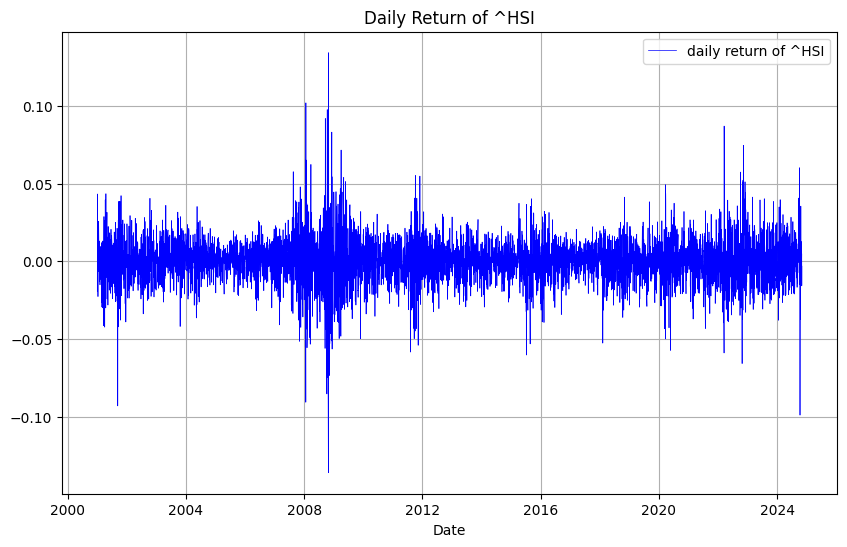

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(mkt_log_returns,label='daily return of ^HSI', lw='0.5',c='b')
plt.title("Daily Return of ^HSI")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

Box Plot of Returns

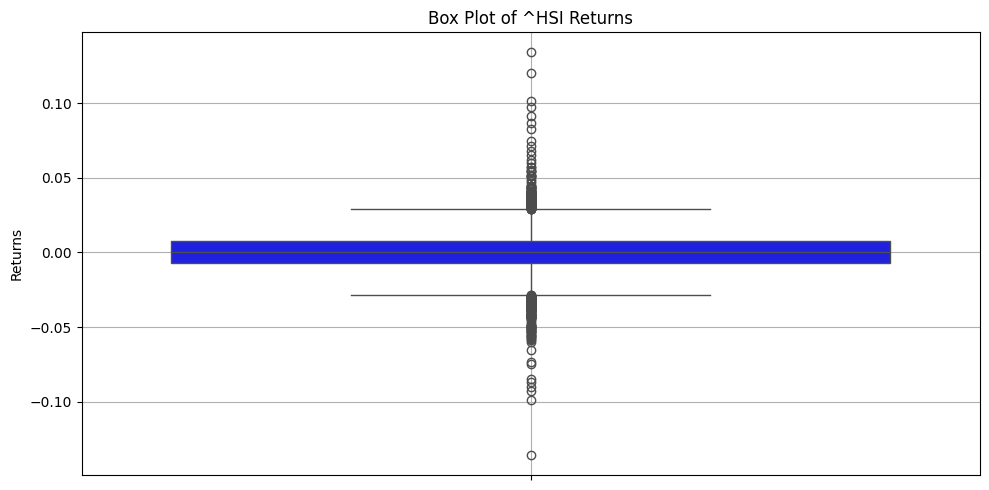

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=mkt_log_returns['^HSI'], color='blue')
plt.title("Box Plot of ^HSI Returns")
plt.ylabel("Returns")
plt.grid()
plt.tight_layout()

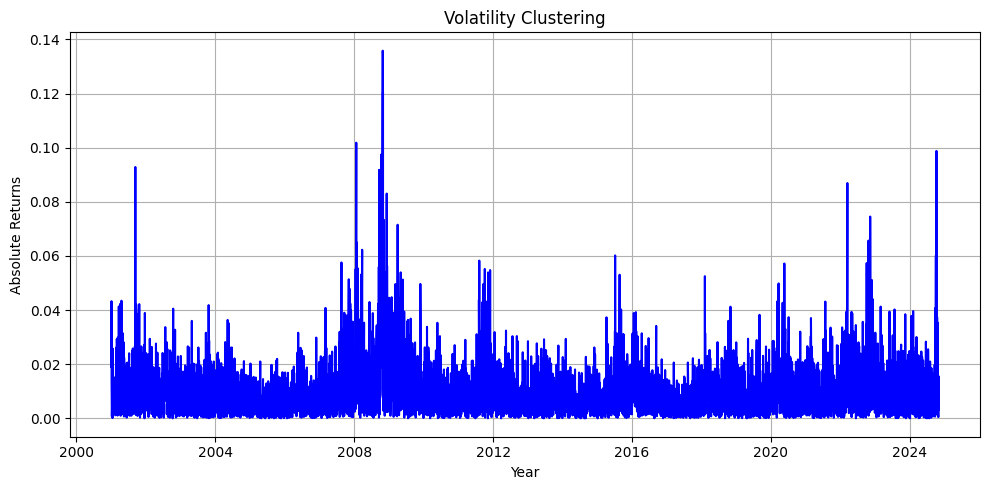

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(mkt_log_returns.index, abs(mkt_log_returns['^HSI']), color='blue')
plt.title("Volatility Clustering")
plt.xlabel("Year")
plt.ylabel("Absolute Returns")
plt.grid()
plt.tight_layout()

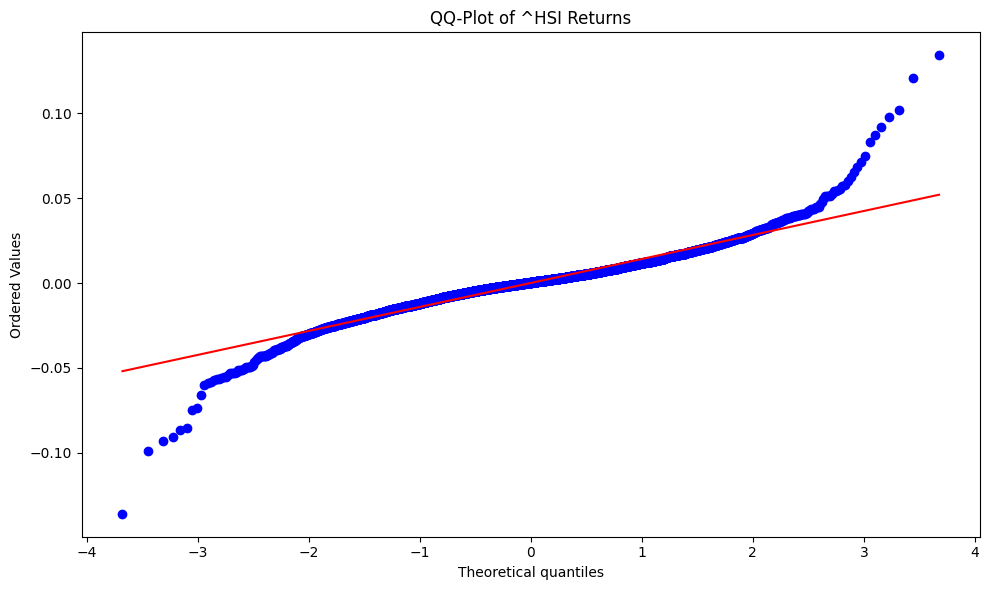

In [7]:
plt.figure(figsize=(10, 6))
stats.probplot(mkt_log_returns['^HSI'], dist="norm", plot=plt)
plt.title("QQ-Plot of ^HSI Returns")
plt.tight_layout()

In [8]:
# Calculate skewness and kurtosis
returns_skewness = skew(mkt_log_returns['^HSI'])
returns_kurtosis = kurtosis(mkt_log_returns['^HSI'], fisher=True)  # Fisher's definition: normal distribution kurtosis = 0

# Display results
print(f"Skewness of ^HSI Daily Returns: {returns_skewness:.4f}")
print(f"Kurtosis of ^HSI Daily Returns: {returns_kurtosis:.4f}")

Skewness of ^HSI Daily Returns: -0.0062
Kurtosis of ^HSI Daily Returns: 7.3513


In [9]:

# get all the stocks name of HSI index
df = pd.read_excel('all_stocks.xlsx')
all_stock_name = df['股份代號 Stock Code'].tolist()
all_industry_name = df['行業 Industry'].tolist()
industry = {}
for i in range(len(all_stock_name)):
    industry[all_stock_name[i]] = ''.join(filter(str.isalpha, all_industry_name[i]))
industry

{'0001.HK': 'Conglomerates綜合企業',
 '0002.HK': 'Utilities公用事業',
 '0003.HK': 'Utilities公用事業',
 '0005.HK': 'Financials金融業',
 '0006.HK': 'Utilities公用事業',
 '0011.HK': 'Financials金融業',
 '0012.HK': 'PropertiesandConstruction地產建築業',
 '0016.HK': 'PropertiesandConstruction地產建築業',
 '0017.HK': 'PropertiesandConstruction地產建築業',
 '0027.HK': 'ConsumerDiscretionary非必需性消費',
 '0066.HK': 'ConsumerDiscretionary非必需性消費',
 '0101.HK': 'PropertiesandConstruction地產建築業',
 '0175.HK': 'ConsumerDiscretionary非必需性消費',
 '0241.HK': 'Healthcare醫療保健業',
 '0267.HK': 'Conglomerates綜合企業',
 '0285.HK': 'InformationTechnology資訊科技業',
 '0288.HK': 'ConsumerStaples必需性消費',
 '0291.HK': 'ConsumerStaples必需性消費',
 '0316.HK': 'Industrials工業',
 '0322.HK': 'ConsumerStaples必需性消費',
 '0386.HK': 'Energy能源業',
 '0388.HK': 'Financials金融業',
 '0669.HK': 'ConsumerDiscretionary非必需性消費',
 '0688.HK': 'PropertiesandConstruction地產建築業',
 '0700.HK': 'InformationTechnology資訊科技業',
 '0762.HK': 'Telecommunications電訊業',
 '0823.HK': 'PropertiesandConstruction地產建築業'

In [10]:
hs_data = yf.download(all_stock_name, start='2001-01-01', end='2024-11-01')
hs_return = hs_data['Adj Close']
hs_log_returns = np.log(hs_return / hs_return.shift(1))
hs_log_returns = hs_log_returns.iloc[1:,:]
hs_log_returns.to_csv('hs_returns.csv')
hs_log_returns

[*********************100%***********************]  82 of 82 completed


Ticker,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0012.HK,0016.HK,0017.HK,0027.HK,...,3988.HK,6618.HK,6690.HK,6862.HK,9618.HK,9633.HK,9888.HK,9961.HK,9988.HK,9999.HK
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-0.002509,-0.020780,-0.026434,-0.021788,-0.021053,-0.019231,-0.002522,-0.009693,-0.005305,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,-0.015190,0.013038,-0.027150,-0.013304,-0.008905,-0.014670,-0.041244,-0.039741,-0.021506,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,0.054604,-0.031581,-0.051777,0.039392,-0.049506,0.043380,0.097700,0.087293,0.127398,0.019048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,0.004819,0.002670,-0.009709,0.017022,0.014925,0.009390,0.023586,0.033489,0.100084,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,0.004796,0.000000,0.033576,-0.008474,-0.016807,-0.033258,0.013889,-0.009023,0.050644,0.037041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,-0.002392,-0.002243,0.000000,0.001454,-0.000967,0.008940,-0.005854,0.017186,0.038634,0.013206,...,-0.002642,0.049480,-0.001654,0.010376,0.012887,0.010239,0.003452,0.004977,0.012665,0.008104
2024-10-28,0.002392,0.003736,0.001633,0.002901,0.003861,0.009380,0.003906,0.008192,0.008521,0.021630,...,-0.002649,0.011997,-0.013334,0.029246,0.012723,0.013491,0.016520,0.009881,0.013542,0.000807
2024-10-29,-0.007194,-0.002987,0.001630,0.036264,-0.001929,0.010833,-0.015717,-0.004088,-0.007299,0.001425,...,0.000000,0.003401,0.000000,-0.005025,0.026818,-0.018597,0.026207,0.029865,0.009269,0.022330


In [11]:
hs_log_returns = hs_log_returns.dropna(axis=1)
hs_log_returns

Ticker,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0012.HK,0016.HK,0017.HK,0027.HK,...,0386.HK,0388.HK,0688.HK,0762.HK,0857.HK,0941.HK,0992.HK,1038.HK,1044.HK,1109.HK
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,-0.002509,-0.020780,-0.026434,-0.021788,-0.021053,-0.019231,-0.002522,-0.009693,-0.005305,0.000000,...,-0.016393,-0.011236,-0.009950,-0.012632,0.000000,-0.011807,-0.047006,-0.003899,0.023257,0.000000
2001-01-03,-0.015190,0.013038,-0.027150,-0.013304,-0.008905,-0.014670,-0.041244,-0.039741,-0.021506,0.000000,...,-0.016667,-0.017095,-0.020203,-0.021414,-0.031253,-0.031366,-0.038151,0.030772,-0.017391,-0.018576
2001-01-04,0.054604,-0.031581,-0.051777,0.039392,-0.049506,0.043380,0.097700,0.087293,0.127398,0.019048,...,0.072907,0.033901,0.040006,0.034046,0.105360,0.050190,0.080043,-0.034685,-0.011765,0.018576
2001-01-05,0.004819,0.002670,-0.009709,0.017022,0.014925,0.009390,0.023586,0.033489,0.100084,0.000000,...,-0.031749,0.021979,0.000000,-0.004193,-0.051293,0.013889,0.045120,0.019419,0.000000,0.030214
2001-01-08,0.004796,0.000000,0.033576,-0.008474,-0.016807,-0.033258,0.013889,-0.009023,0.050644,0.037041,...,0.000000,-0.013681,0.066375,-0.016949,0.022305,0.029447,-0.009852,-0.019419,-0.005935,0.040822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,-0.002392,-0.002243,0.000000,0.001454,-0.000967,0.008940,-0.005854,0.017186,0.038634,0.013206,...,-0.006557,0.003844,-0.014956,-0.021724,-0.004963,-0.004843,0.020203,-0.000910,0.006283,-0.005946
2024-10-28,0.002392,0.003736,0.001633,0.002901,0.003861,0.009380,0.003906,0.008192,0.008521,0.021630,...,-0.011025,0.001916,0.040274,-0.013265,-0.015038,-0.006261,-0.012809,-0.001823,-0.006283,0.021633
2024-10-29,-0.007194,-0.002987,0.001630,0.036264,-0.001929,0.010833,-0.015717,-0.004088,-0.007299,0.001425,...,-0.020157,-0.001277,-0.032088,-0.008942,-0.022129,-0.004196,-0.011111,0.003643,-0.002103,-0.015687


only keep 25 stocks, and other stocks have empty data

### KMO: shortest length of sliding window that a PCA could be efficiently applied to

In [12]:
def calculate_kmo(data):
    """
    Calculate the KMO statistic for a given data matrix.
    """
    corr_matrix = np.corrcoef(data, rowvar=False)  # Correlation matrix
    inv_corr_matrix = np.linalg.inv(corr_matrix)  # Inverse of correlation matrix

    # Partial correlations
    partial_corr = -inv_corr_matrix / np.sqrt(np.outer(np.diag(inv_corr_matrix), np.diag(inv_corr_matrix)))
    np.fill_diagonal(partial_corr, 0)  # Remove self-correlations

    # KMO numerator and denominator
    correlations_sq = corr_matrix**2
    partial_corr_sq = partial_corr**2
    np.fill_diagonal(correlations_sq, 0)  # Exclude diagonal
    np.fill_diagonal(partial_corr_sq, 0)

    kmo_num = correlations_sq.sum()
    kmo_denom = kmo_num + partial_corr_sq.sum()

    kmo_value = kmo_num / kmo_denom
    return kmo_value

In [13]:
# Rolling window sizes to test
window_sizes = [30, 40, 50, 60, 120, 180, 252]  # 3 months, 6 months, etc. (assuming ~252 trading days/year)

# Store results
kmo_results = {window: [] for window in window_sizes}

# Rolling KMO calculation
for window in window_sizes:
    for start in range(len(hs_log_returns) - window + 1):
        window_data = hs_log_returns.iloc[start:start + window]
        kmo_value = calculate_kmo(window_data.values)
        kmo_results[window].append(kmo_value)

    print('------------------------------------')
    print(f"Window Size: {window}")
    print(f"Mean KMO: {np.mean(kmo_results[window]):.4f}")
    print(f"Min KMO: {np.min(kmo_results[window]):.4f}")
    print(f"Max KMO: {np.max(kmo_results[window]):.4f}")

------------------------------------
Window Size: 30
Mean KMO: 0.5026
Min KMO: 0.0880
Max KMO: 0.8362
------------------------------------
Window Size: 40
Mean KMO: 0.6940
Min KMO: 0.2795
Max KMO: 0.8958
------------------------------------
Window Size: 50
Mean KMO: 0.7692
Min KMO: 0.4186
Max KMO: 0.9139
------------------------------------
Window Size: 60
Mean KMO: 0.8085
Min KMO: 0.5724
Max KMO: 0.9289
------------------------------------
Window Size: 120
Mean KMO: 0.8891
Min KMO: 0.7210
Max KMO: 0.9485
------------------------------------
Window Size: 180
Mean KMO: 0.9128
Min KMO: 0.7470
Max KMO: 0.9578
------------------------------------
Window Size: 252
Mean KMO: 0.9260
Min KMO: 0.7823
Max KMO: 0.9602


As KMO for window=60 is 0.5724-0.9289, so we select window size = 60days.

In [14]:
# get all std 
std_dev = hs_log_returns.std().sort_values(ascending=False)
std_dev

Ticker
0027.HK    0.032495
1109.HK    0.029481
0992.HK    0.028308
0688.HK    0.026952
0291.HK    0.025503
0762.HK    0.024340
0267.HK    0.024322
0017.HK    0.024279
0322.HK    0.023594
0386.HK    0.022014
0388.HK    0.021795
0857.HK    0.021041
0101.HK    0.020960
1044.HK    0.019770
0012.HK    0.019329
0016.HK    0.017967
0941.HK    0.017952
0001.HK    0.017429
0005.HK    0.015805
1038.HK    0.014388
0066.HK    0.014115
0011.HK    0.013656
0003.HK    0.013600
0006.HK    0.011480
0002.HK    0.010888
dtype: float64

### cov

In [15]:
# Calculate the covariance matrix
cov_matrix = np.cov(hs_log_returns.T)

# Perform PCA
pca = PCA(n_components=24)
X_pca = pca.fit_transform(cov_matrix)

# Extract PCA coefficients (eigenvectors)
pca_coefficients = pca.components_  # Shape: (25 PCs x 25 stocks)

# Create a DataFrame for better interpretation
stock_names = hs_log_returns.columns.tolist()
pca_df = pd.DataFrame(pca_coefficients.T, columns=[f"PC{i+1}" for i in range(24)], index=stock_names)
pca_df["Industry"] = None # Add industry classification
for i in range(len(pca_df)):
    row = pca_df.iloc[i,:]
    code = row.name
    pca_df.iloc[i,24] = industry[code]
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Industry
0001.HK,0.150791,-0.054710,0.075485,-0.166874,-0.002093,-0.128214,-0.072533,-0.018646,-0.007762,-0.027843,...,0.205469,-0.066966,-0.073128,0.273628,0.635255,-0.301059,-0.255275,-0.257269,-0.073389,Conglomerates綜合企業
0002.HK,-0.004506,-0.011686,-0.002081,-0.063264,-0.021843,-0.001968,0.034496,0.029087,-0.001759,-0.052723,...,-0.161703,0.038451,-0.001940,-0.133563,-0.010770,-0.293342,-0.123848,-0.034926,-0.637592,Utilities公用事業
0003.HK,0.013663,-0.016888,0.004447,-0.102556,-0.010741,-0.049742,0.045753,0.037664,-0.004098,-0.064124,...,-0.464308,0.019424,-0.193634,-0.161383,0.579760,0.542438,0.165933,0.085090,0.054786,Utilities公用事業
0005.HK,0.095996,-0.019157,0.076797,-0.085517,-0.016950,0.019145,-0.021256,0.065073,-0.063126,-0.041432,...,0.274345,-0.157526,-0.097503,-0.122811,0.007014,0.212175,-0.325812,0.176710,0.007349,Financials金融業
0006.HK,-0.015231,-0.018583,-0.015944,-0.057457,-0.055027,0.005233,0.024112,0.011250,-0.010752,-0.088705,...,0.002562,-0.059960,0.073140,-0.134859,0.018148,-0.203551,-0.261669,-0.106823,0.735977,Utilities公用事業
0011.HK,0.072559,-0.026889,0.035672,-0.097316,-0.024095,-0.048442,-0.014024,0.043037,-0.008841,-0.051395,...,0.000847,-0.065604,-0.092810,0.129013,-0.049721,-0.159839,0.711339,-0.477829,0.109188,Financials金融業
0012.HK,0.177607,-0.068215,0.072966,-0.217769,0.001840,-0.272490,-0.117919,-0.052586,-0.011398,0.004890,...,-0.173000,-0.145166,0.138930,-0.279695,-0.380828,0.319692,-0.158927,-0.368017,-0.054410,PropertiesandConstruction地產建築業
0016.HK,0.165576,-0.072763,0.073663,-0.203412,-0.003486,-0.240999,-0.114451,-0.051258,-0.006759,0.010728,...,0.019583,-0.046252,0.082549,-0.030332,-0.029438,-0.218526,0.340980,0.710603,0.087014,PropertiesandConstruction地產建築業
0017.HK,0.251704,-0.069219,0.093376,-0.291747,0.044635,-0.431141,-0.171068,-0.034549,-0.039915,0.165354,...,-0.005711,0.096017,-0.007476,-0.046642,0.000145,-0.054203,-0.047335,-0.036601,-0.002692,PropertiesandConstruction地產建築業
0027.HK,0.312155,0.933607,0.090880,-0.072923,-0.022720,0.087711,-0.046231,-0.006316,0.031317,-0.056451,...,-0.005396,0.021270,-0.002055,-0.013119,-0.003583,-0.003237,0.007665,0.003632,0.007259,ConsumerDiscretionary非必需性消費


### draw bi-plots for PC1 to PC12

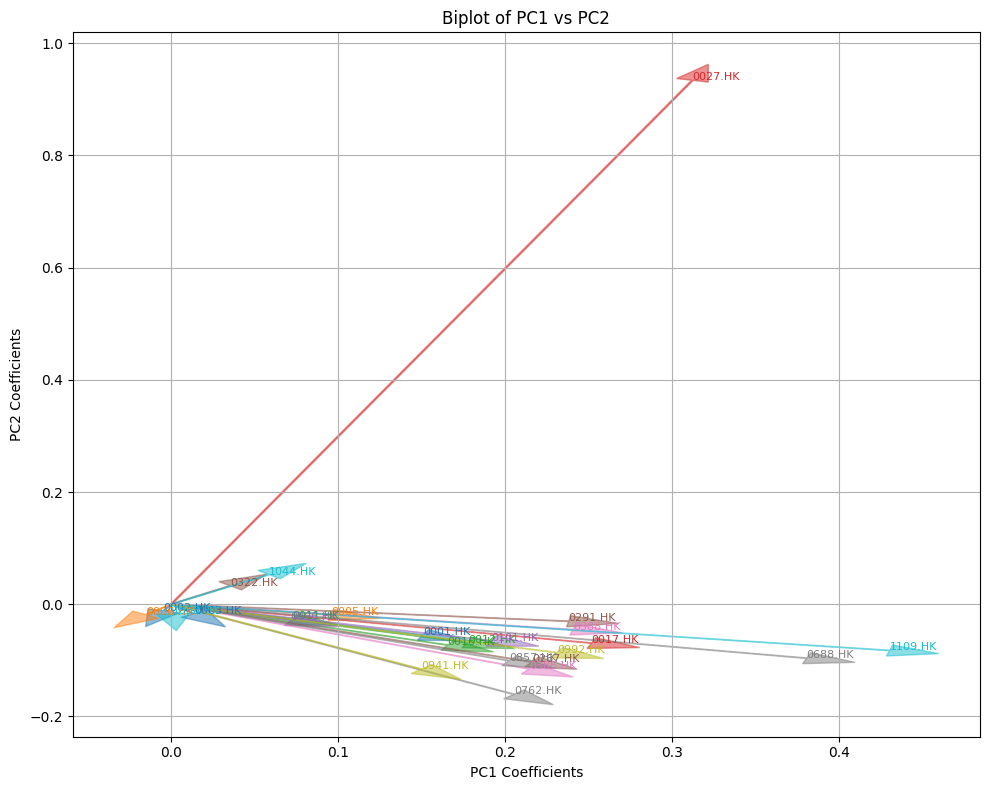

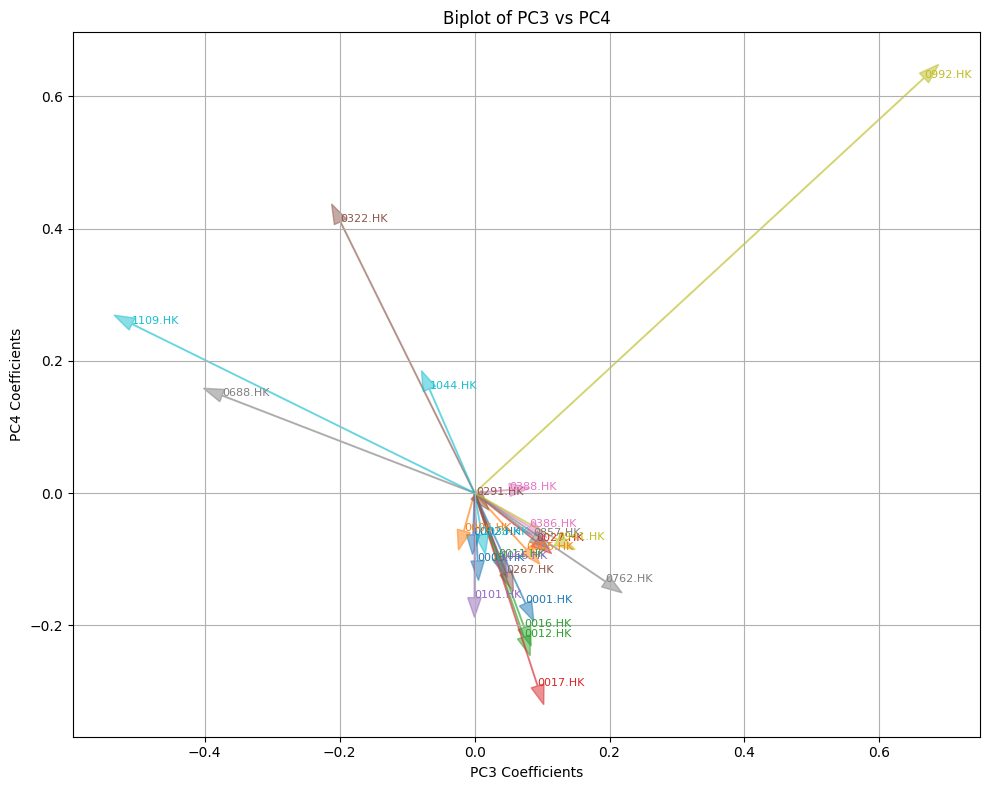

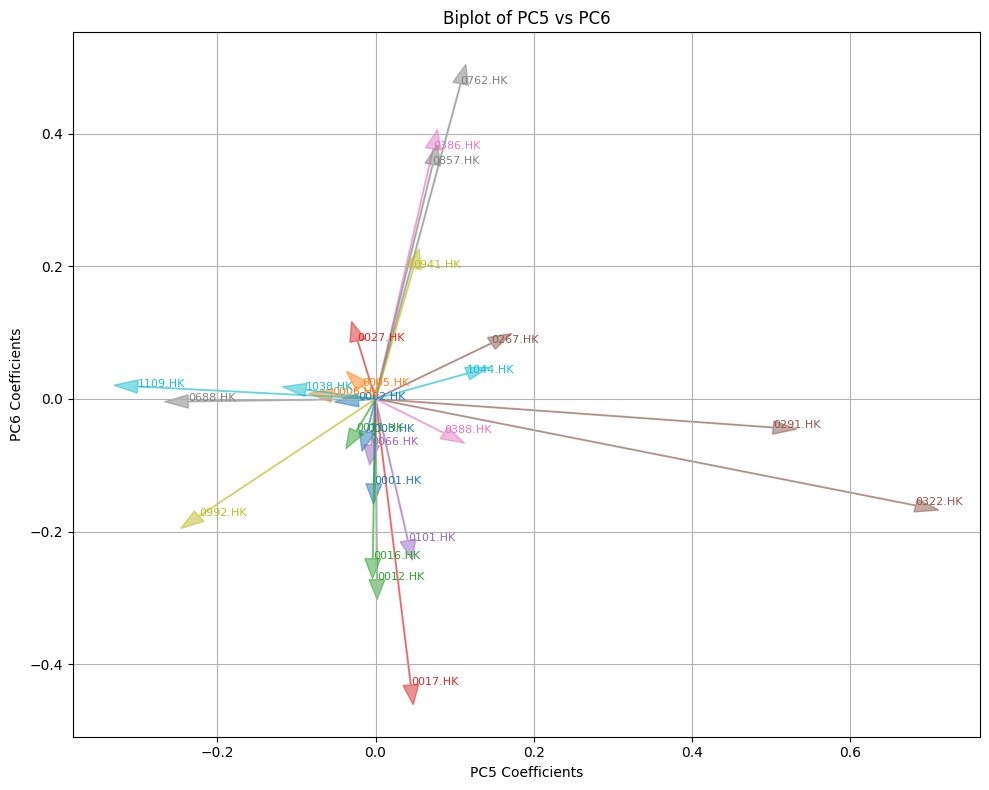

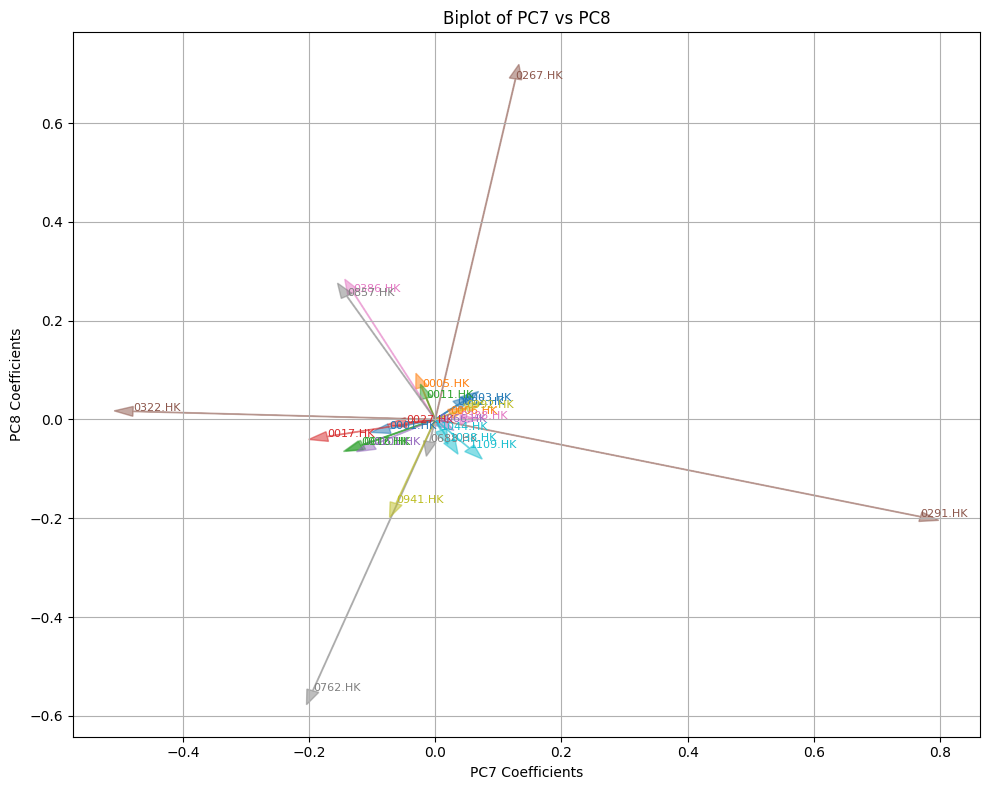

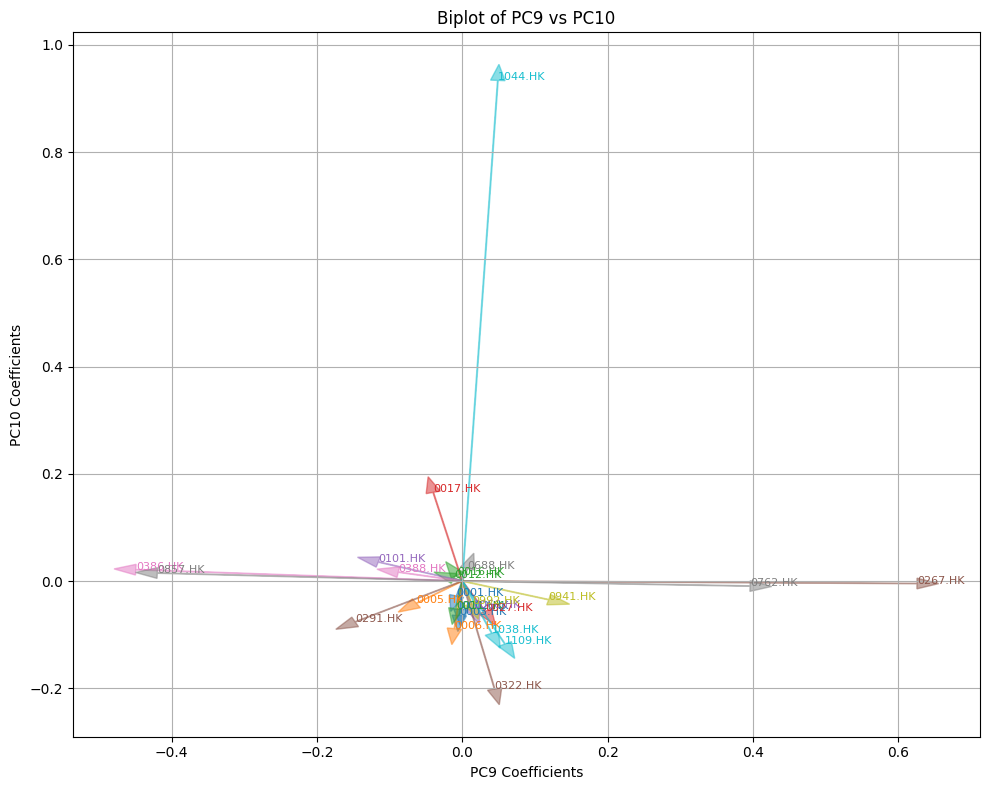

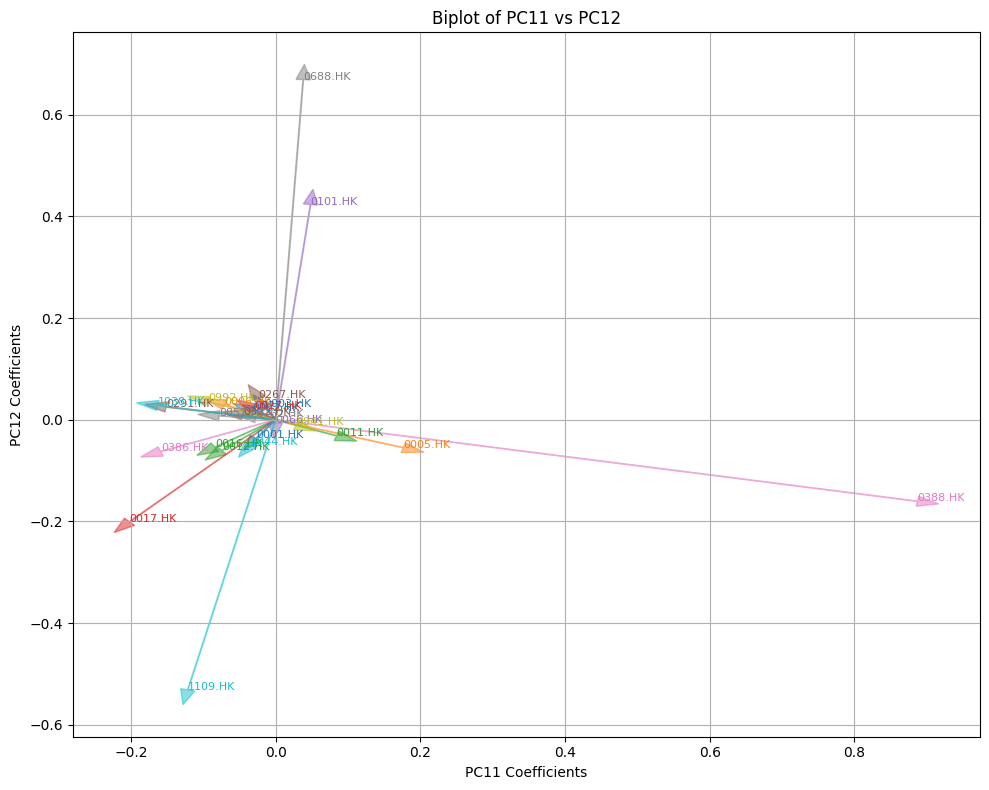

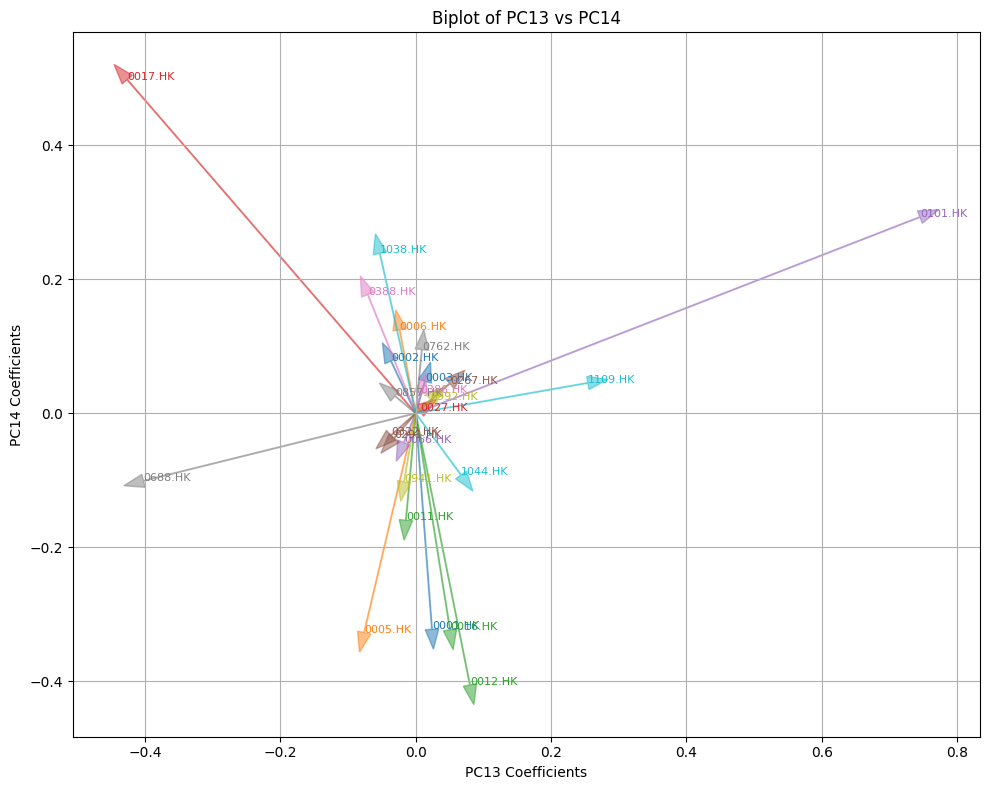

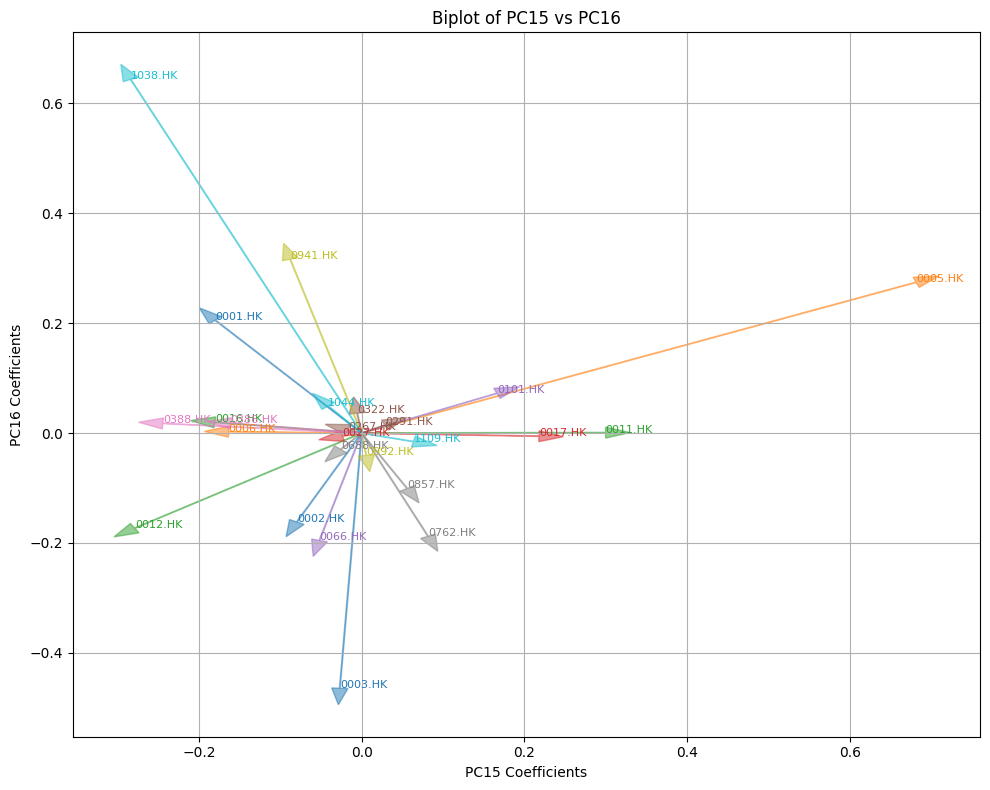

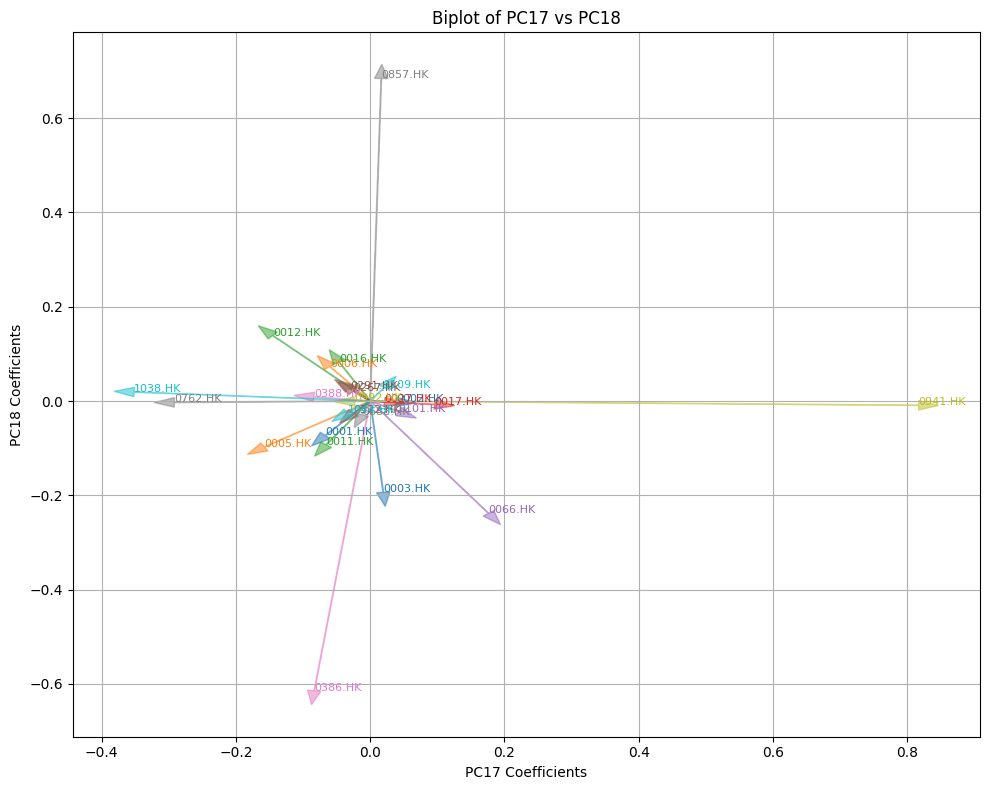

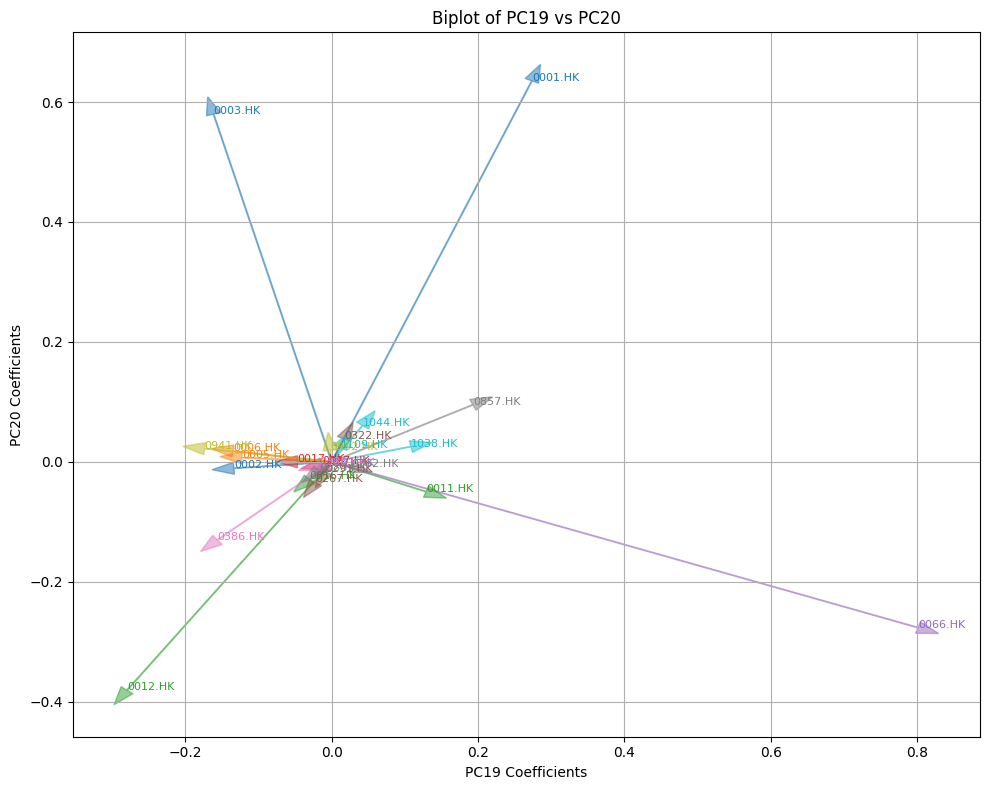

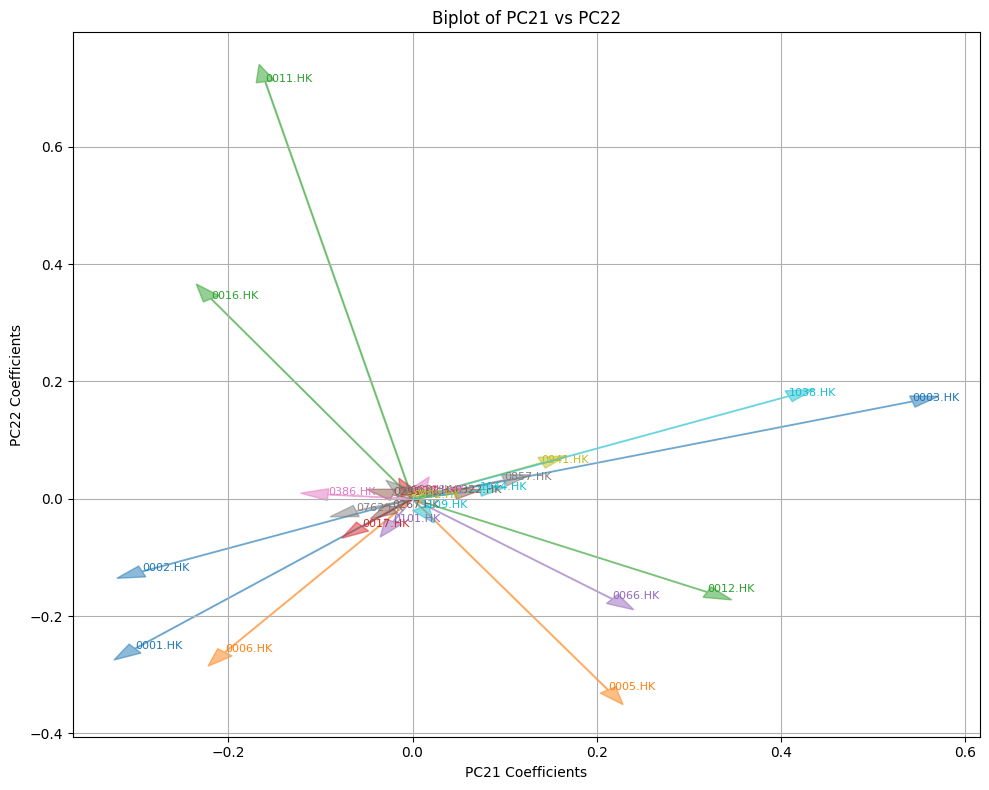

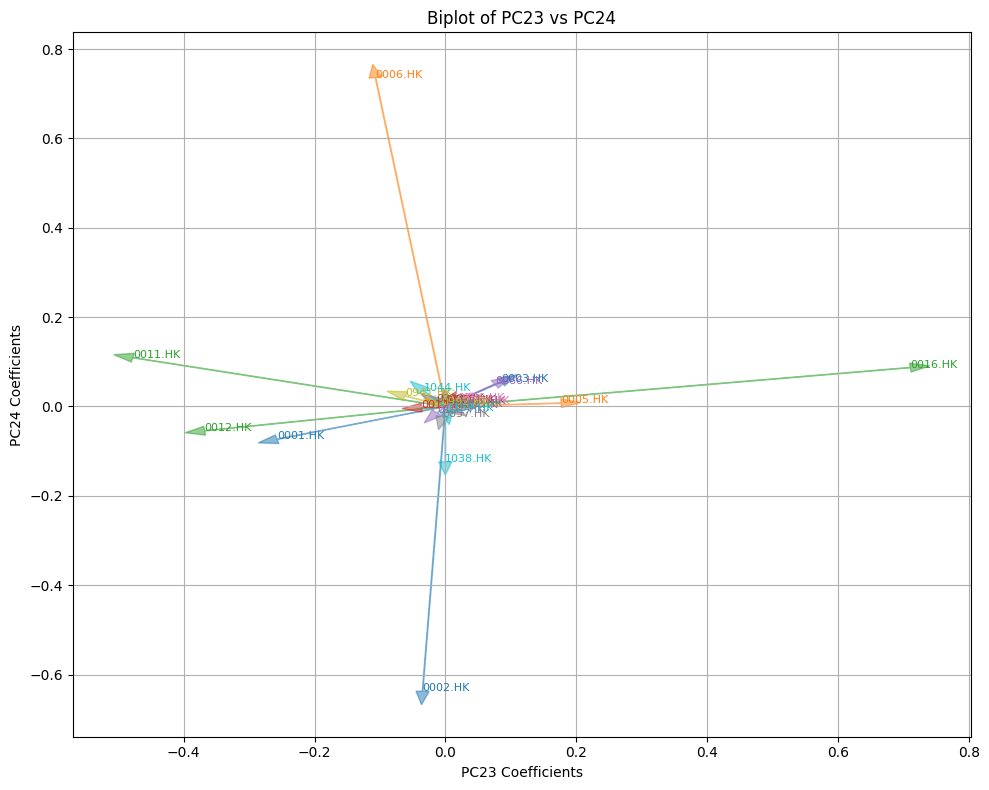

In [16]:
# Function to plot biplots
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, 25))
def plot_biplot(pca_df, i):
    pc_x = f"PC{i+1}"
    pc_y = f"PC{i+2}"
    plt.figure(figsize=(10, 8))
    # sns.scatterplot(
    #     x=pca_df[pc_x],
    #     y=pca_df[pc_y],
    #     hue=pca_df["Industry"],
    #     style=pca_df["Industry"],
    #     s=100,
    #     palette="tab10"
    # )
    # plt.scatter(X_pca[:, i], X_pca[:, i+1])
    for j in range(len(pca_df)):
        plt.arrow(0, 0, pca_coefficients[i, j], pca_coefficients[i+1, j], alpha=0.5, color=colors[j],head_width=0.02)
        # plt.text(pca_coefficients[i,j], pca_coefficients[i+1, j], )
        plt.text(pca_df[pc_x][j], pca_df[pc_y][j], pca_df.index[j], fontsize=8, color=colors[j])
        
    plt.title(f"Biplot of {pc_x} vs {pc_y}")
    plt.xlabel(f"{pc_x} Coefficients")
    plt.ylabel(f"{pc_y} Coefficients")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Generate bi-plots for PCs 1 to 24
for i in range(0, 24, 2):  # Plot pairs of PCs: (PC1, PC2), (PC3, PC4), etc.
    plot_biplot(pca_df, i)


### corr

In [17]:
# Calculate the correlation matrix
corr_matrix = np.corrcoef(hs_log_returns.T)

# Perform PCA
pca = PCA(n_components=24)
X_pca = pca.fit_transform(corr_matrix)

# Extract PCA coefficients (eigenvectors)
pca_coefficients = pca.components_  # Shape: (24 PCs x 25 stocks)

# Create a DataFrame for better interpretation
stock_names = hs_log_returns.columns.tolist()
pca_df = pd.DataFrame(pca_coefficients.T, columns=[f"PC{i+1}" for i in range(24)], index=stock_names)
pca_df["Industry"] = None # Add industry classification
for i in range(len(pca_df)):
    row = pca_df.iloc[i,:]
    code = row.name
    pca_df.iloc[i,24] = industry[code]
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Industry
0001.HK,0.274998,0.167598,-0.112298,-0.085611,0.005176,0.089773,0.028692,-0.112093,-0.018658,-0.030546,...,0.079788,0.150079,-0.380769,-0.134986,-0.054296,0.607603,-0.318793,-0.135124,-0.200680,Conglomerates綜合企業
0002.HK,-0.080098,0.401139,0.041903,0.140707,0.087895,-0.160202,0.027109,0.189153,0.013545,-0.137184,...,-0.146148,-0.503970,-0.116895,-0.225261,-0.048054,0.024608,-0.016064,-0.013843,-0.027946,Utilities公用事業
0003.HK,-0.001283,0.358292,-0.097167,0.027347,0.112554,-0.238429,0.007634,0.292769,-0.002149,-0.068543,...,0.292565,-0.017765,-0.123024,0.000550,0.089435,0.065828,-0.010782,-0.006234,0.015764,Utilities公用事業
0005.HK,0.198581,0.107550,0.072053,-0.225201,-0.107011,-0.355145,-0.073179,-0.206489,0.146697,0.477622,...,-0.028294,0.107225,0.251041,-0.510037,-0.032167,-0.014705,-0.031055,0.040273,0.012638,Financials金融業
0006.HK,-0.124099,0.427069,0.100172,0.259813,0.007052,0.068979,-0.023868,-0.062098,0.059172,-0.121539,...,0.088438,0.674865,0.163678,0.177597,0.076819,0.054637,-0.019054,0.059505,0.021814,Utilities公用事業
0011.HK,0.179215,0.225494,-0.060073,-0.132762,-0.014880,-0.262343,-0.053104,-0.096772,0.145134,0.402016,...,-0.212113,-0.117397,-0.204740,0.707037,0.085008,-0.026475,0.037737,0.023410,-0.040105,Financials金融業
0012.HK,0.297536,0.142957,-0.258615,-0.097189,0.039984,0.141143,0.034660,-0.079593,-0.002215,-0.147199,...,0.038022,0.103780,-0.076195,-0.037015,-0.270453,-0.454954,0.303489,0.116917,-0.548186,PropertiesandConstruction地產建築業
0016.HK,0.309202,0.146360,-0.236820,-0.112168,0.036460,0.165928,0.047624,-0.114402,0.002037,-0.111918,...,-0.002472,0.030614,-0.121072,-0.011267,-0.116636,-0.172995,0.080135,-0.051744,0.794262,PropertiesandConstruction地產建築業
0017.HK,0.282247,0.069090,-0.253069,-0.057569,-0.002186,0.115978,0.055827,-0.057237,0.005681,-0.160740,...,0.157220,-0.288038,0.657427,0.180690,0.362119,0.141373,-0.184525,0.010373,-0.095140,PropertiesandConstruction地產建築業
0027.HK,0.061687,-0.170610,-0.244437,-0.000290,-0.585891,-0.296704,-0.054118,-0.164079,-0.472175,-0.149102,...,0.023858,0.052334,-0.158467,0.026221,0.094817,0.057023,0.024151,0.045017,-0.006368,ConsumerDiscretionary非必需性消費


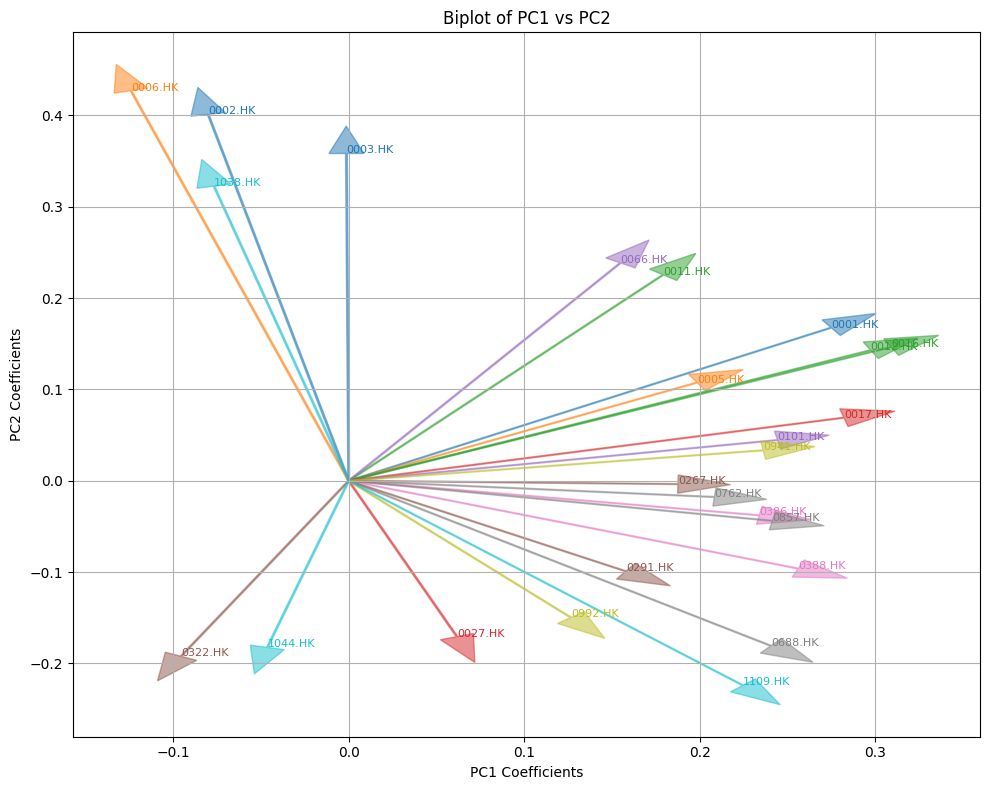

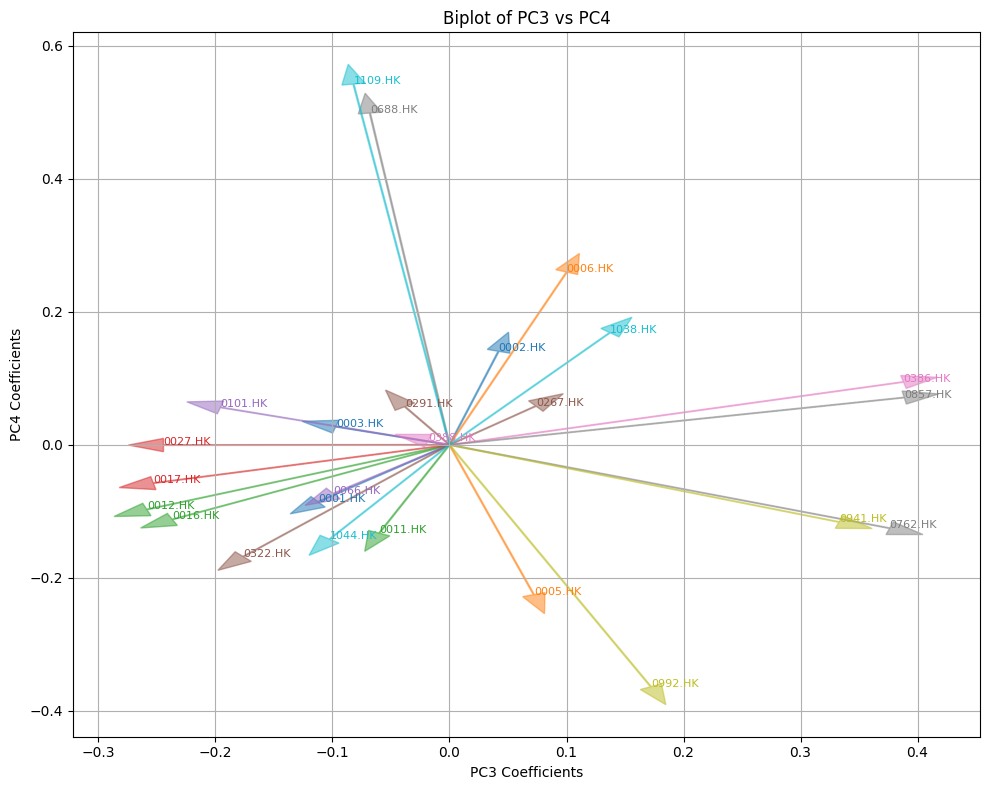

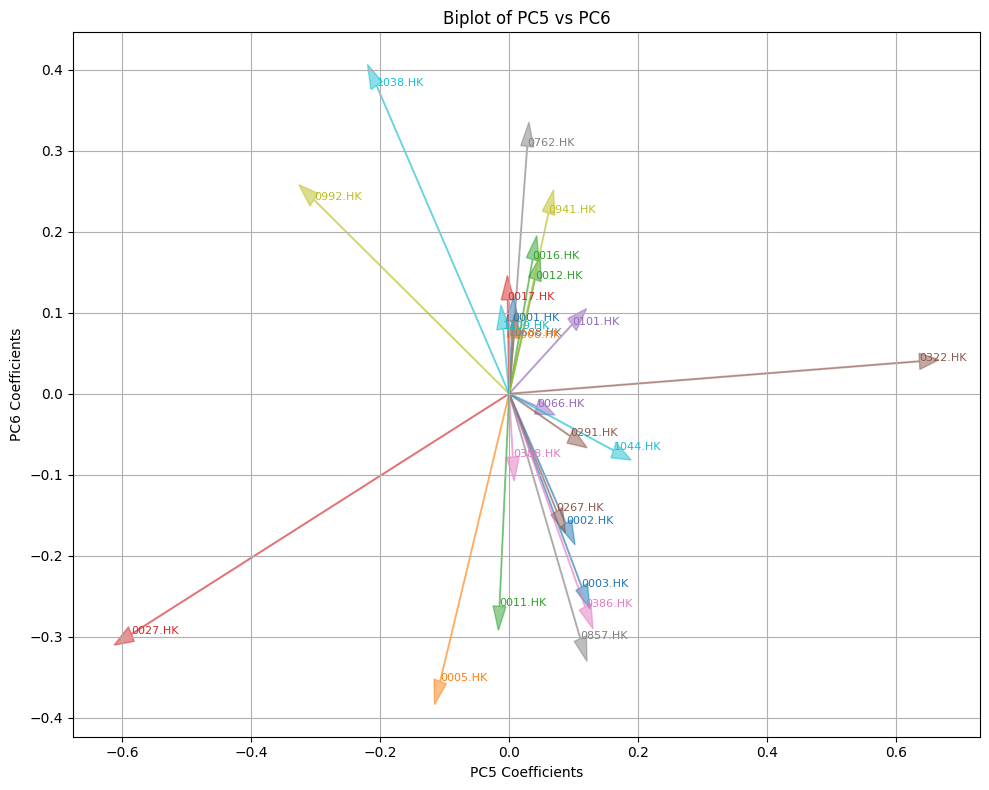

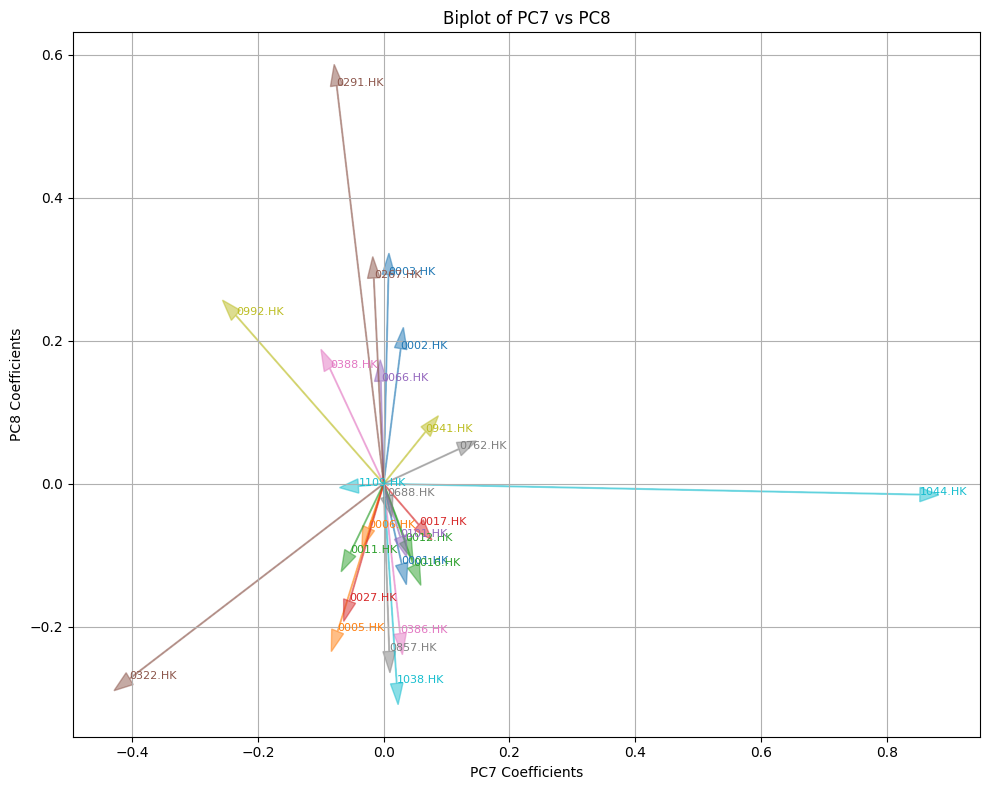

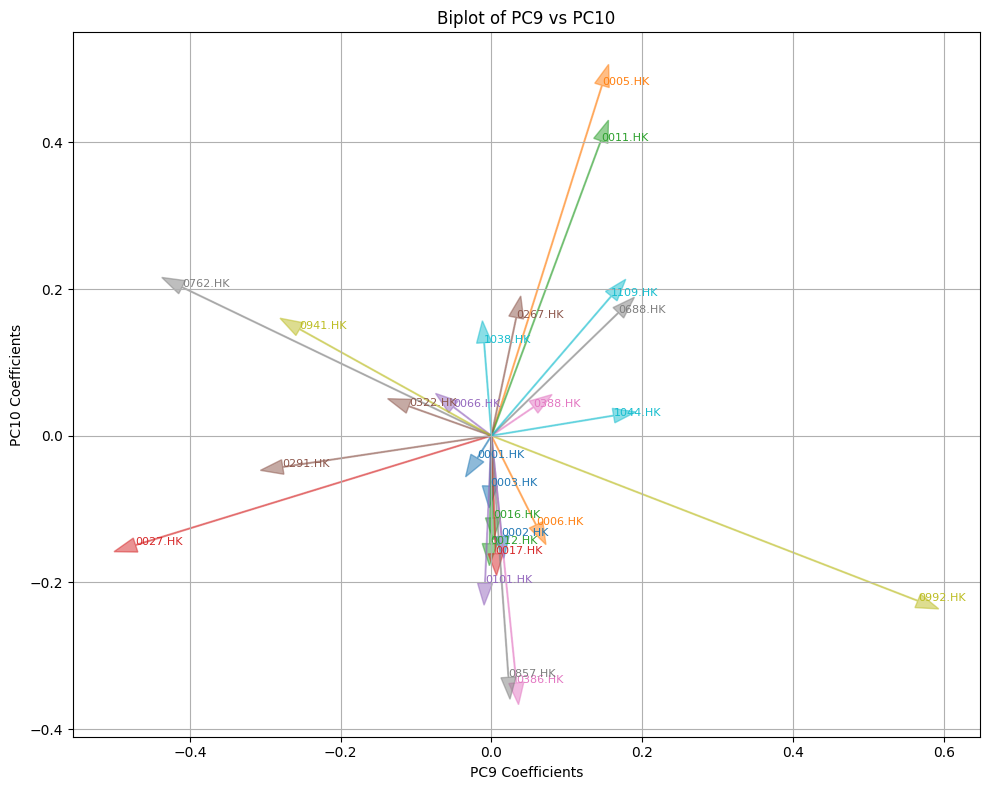

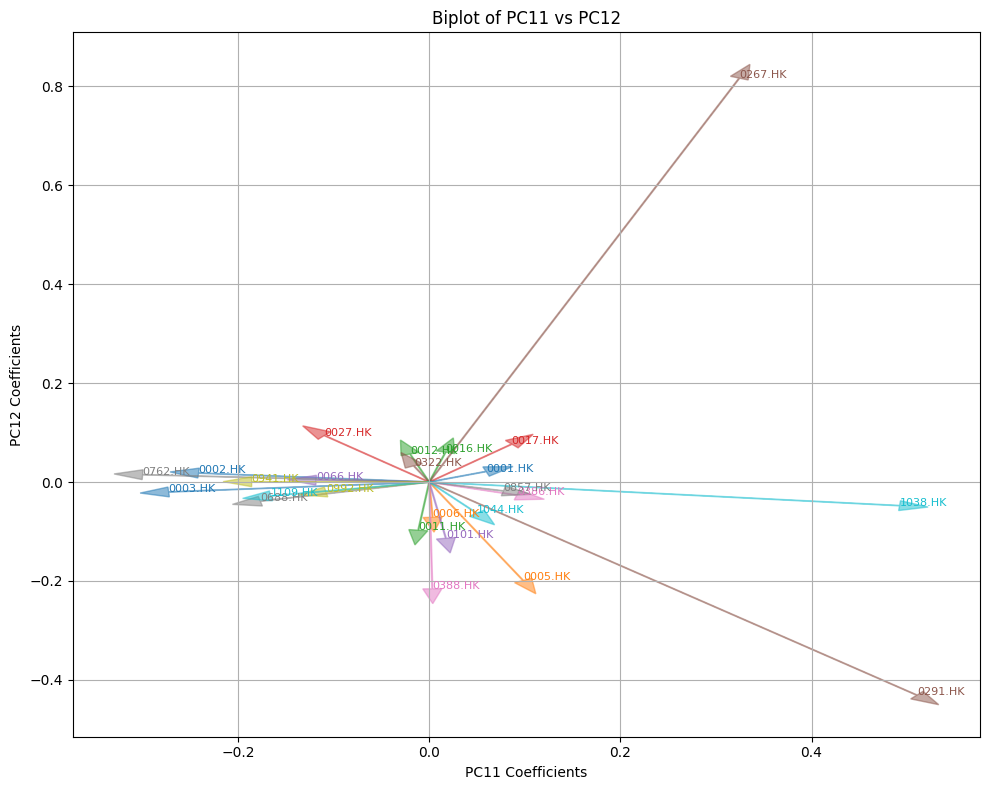

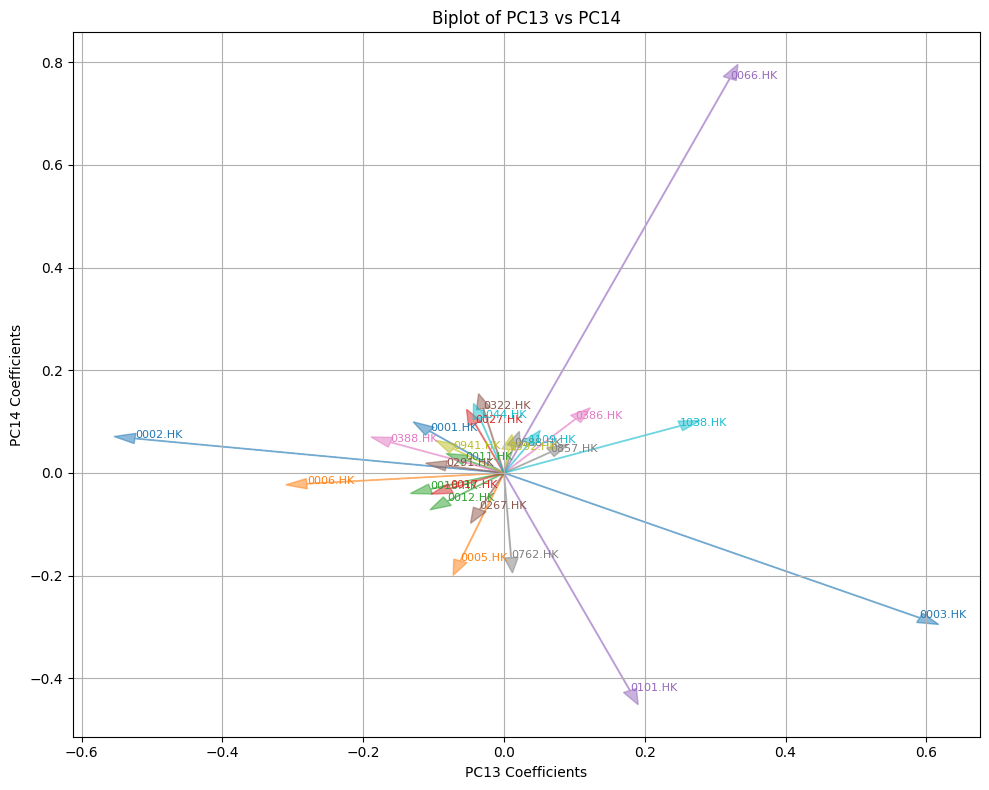

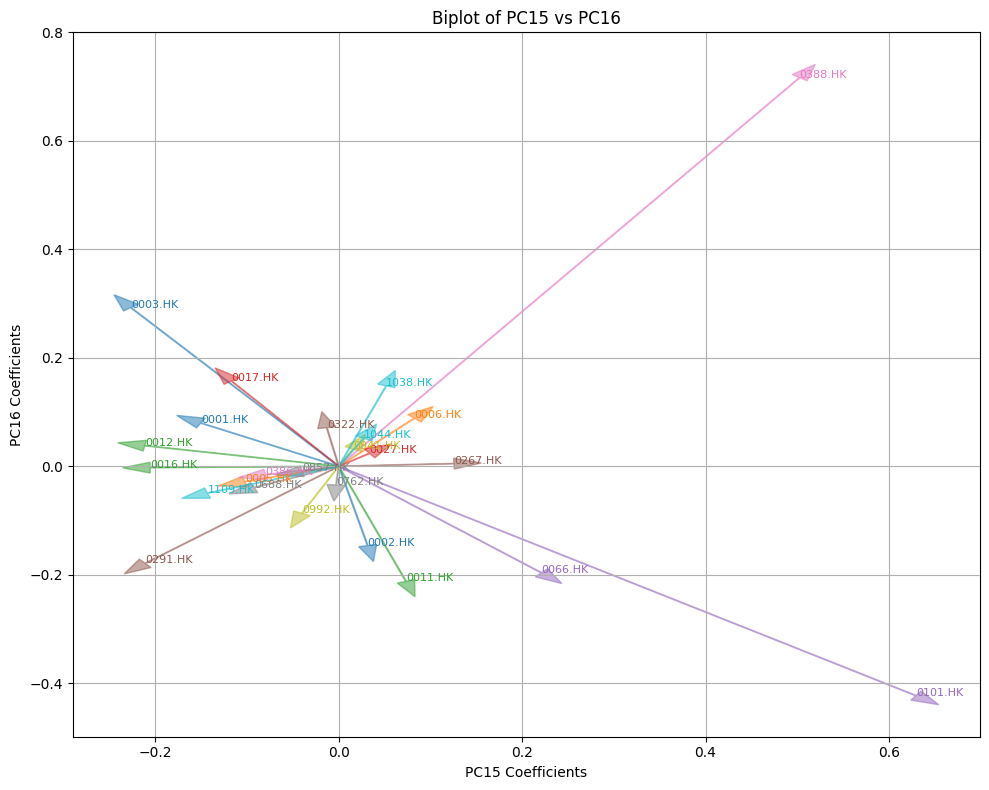

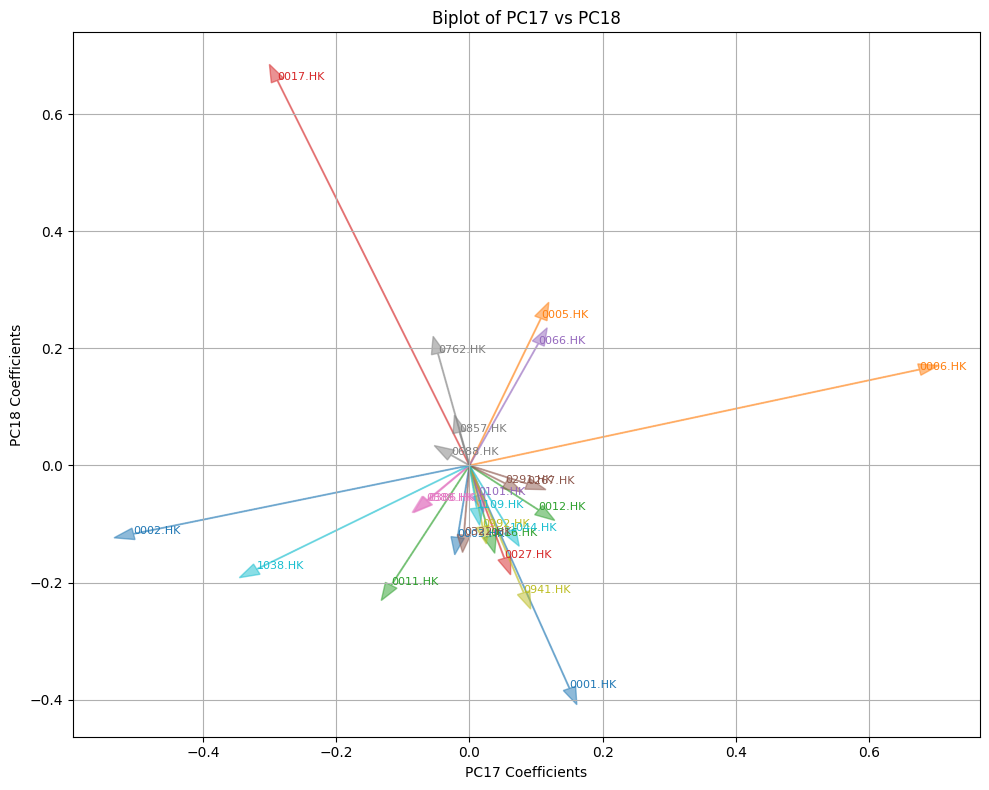

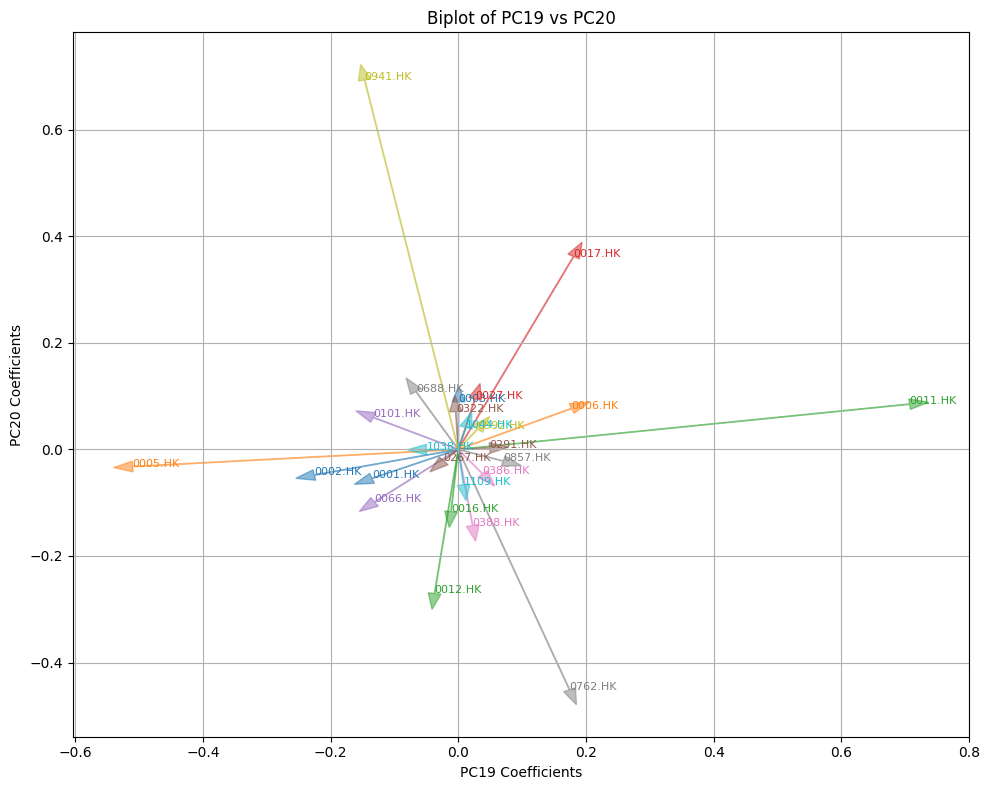

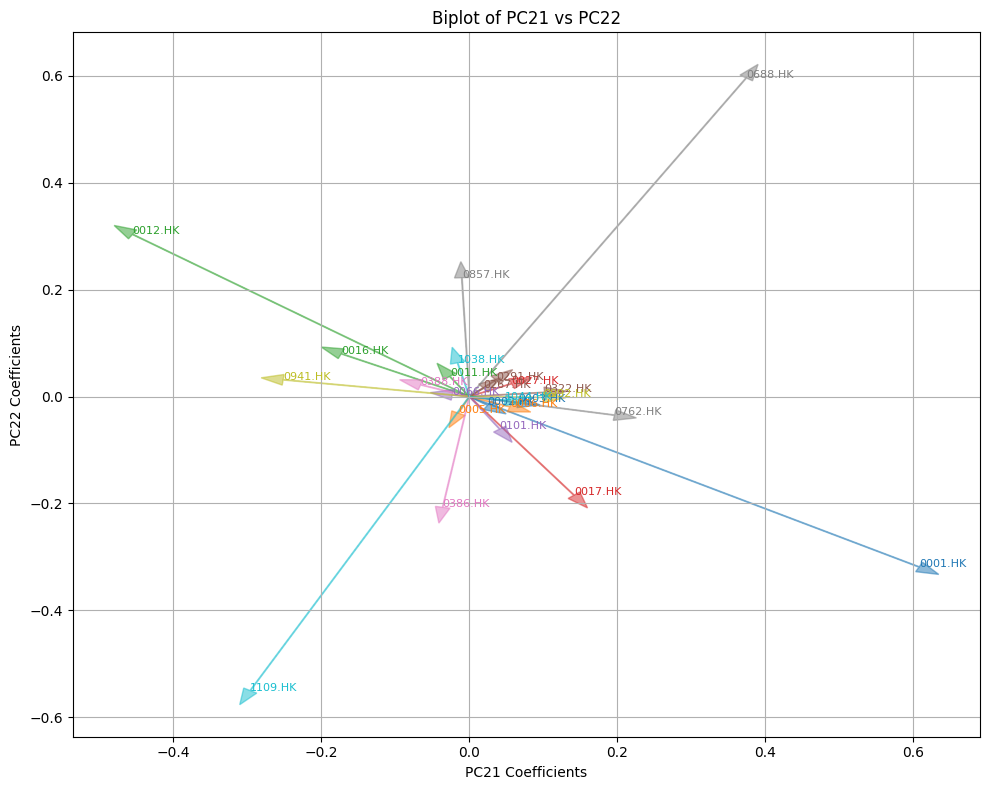

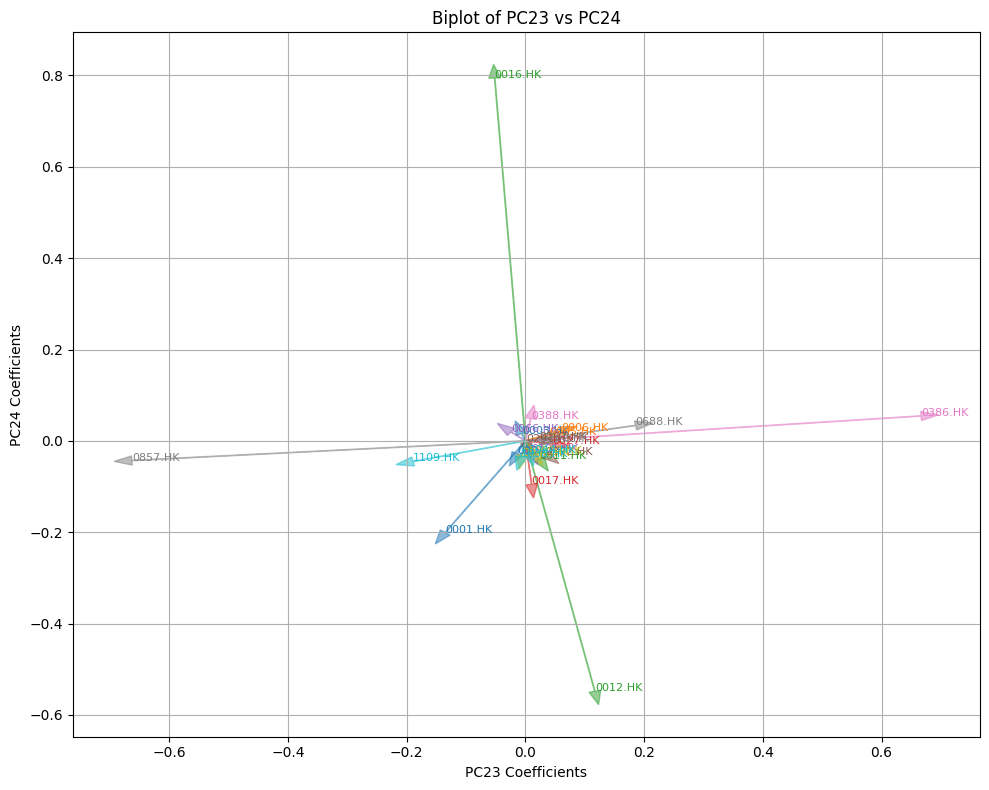

In [18]:
# Function to plot biplots
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, 25))
def plot_biplot(pca_df, i):
    pc_x = f"PC{i+1}"
    pc_y = f"PC{i+2}"
    plt.figure(figsize=(10, 8))
    for j in range(len(pca_df)):
        plt.arrow(0, 0, pca_coefficients[i, j], pca_coefficients[i+1, j], alpha=0.5, color=colors[j],head_width=0.02)
        plt.text(pca_df[pc_x][j], pca_df[pc_y][j], pca_df.index[j], fontsize=8, color=colors[j])
        
    plt.title(f"Biplot of {pc_x} vs {pc_y}")
    plt.xlabel(f"{pc_x} Coefficients")
    plt.ylabel(f"{pc_y} Coefficients")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Generate bi-plots for PCs 1 to 24
for i in range(0, 24, 2):  # Plot pairs of PCs: (PC1, PC2), (PC3, PC4), etc.
    plot_biplot(pca_df, i)

### first rule

cumulative variance is :[ 40.8193388   47.82552874  52.15912714  56.20248969  59.71240725
  62.98807984  66.15907602  67.03751407  68.00338665  70.96883229
  72.07742319  73.22111828  76.01688696  78.78510753  81.38074191
  83.7685391   86.10875788  87.45018724  88.9802616   90.51729702
  92.62135654  94.32955188  96.32090968  98.19792687 100.        ]


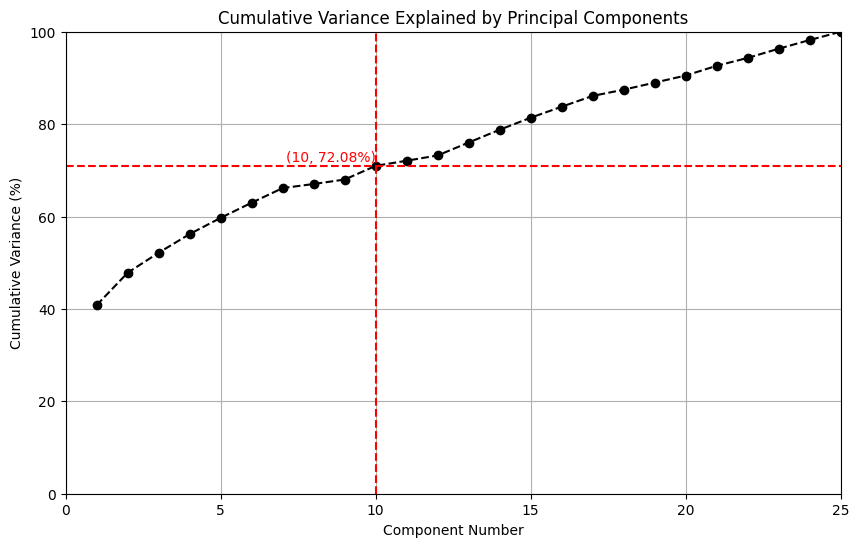

In [19]:
# Total study period from 01/01/2000 to 01/11/2024
eigenvalue, _ = np.linalg.eig(corr_matrix)
p = 25
cumulative_variance = np.cumsum(eigenvalue) * 100/p
print(f"cumulative variance is :{cumulative_variance}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), cumulative_variance, ls='dashed', marker='o', c='black')
plt.axhline(y=cumulative_variance[9], color='r', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--')
plt.text(10, 72, f'(10, {cumulative_variance[10]:.2f}%)', color='red', fontsize=10, ha='right')

# Add labels and title
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Variance (%)')
plt.xlim(0, p)
plt.ylim(0, 100)
plt.grid()
# Show plot
plt.show()

cumulative variance is :[ 35.41294825  41.8169626   47.11824192  47.86882544  51.95283713
  55.8287707   56.93448404  60.57727381  61.80828535  65.14186487
  68.39966362  71.51700893  72.96168655  75.87110284  77.55025839
  79.32038389  81.15563006  83.08306395  85.78930549  88.38394429
  90.92532763  93.30624672  95.64678771  97.78572524 100.        ]


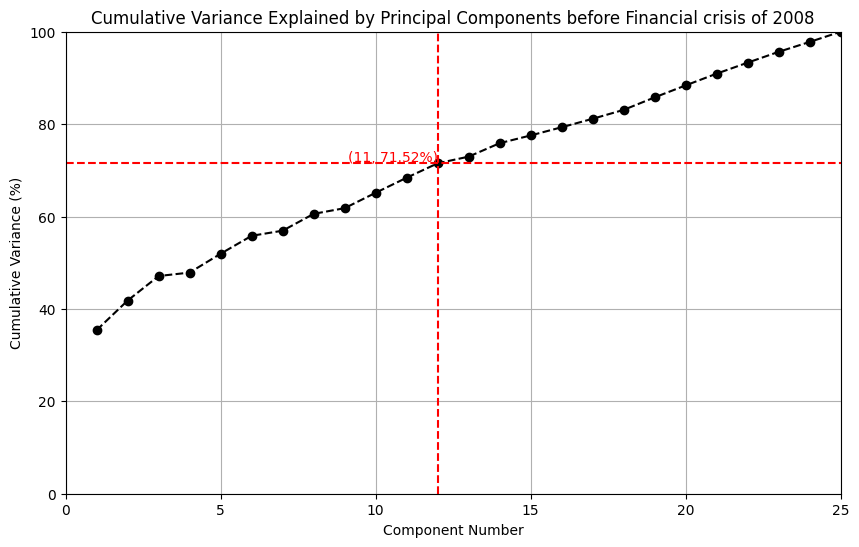

In [20]:
# Total study period from 01/01/2000 to 19/09/2007
hs_2008_before = hs_log_returns.loc[(hs_log_returns.index<'2007-09-19')]
corr_matrix = np.corrcoef(hs_2008_before.T)
eigenvalue, _ = np.linalg.eig(corr_matrix)
p = 25
cumulative_variance = np.cumsum(eigenvalue) * 100/p
print(f"cumulative variance is :{cumulative_variance}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), cumulative_variance, ls='dashed', marker='o', c='black')
plt.axhline(y=cumulative_variance[11], color='r', linestyle='--')
plt.axvline(x=12, color='r', linestyle='--')
plt.text(12, 72, f'(11, {cumulative_variance[11]:.2f}%)', color='red', fontsize=10, ha='right')

# Add labels and title
plt.title('Cumulative Variance Explained by Principal Components before Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Variance (%)')
plt.xlim(0, p)
plt.ylim(0, 100)
plt.grid()
# Show plot
plt.show()

cumulative variance is :[ 43.53975584  50.8454018   55.12375028  59.29874874  62.70889123
  65.90926102  68.84372346  71.64914159  74.36897458  77.01945135
  77.7448557   78.52838605  79.42233481  81.78587475  84.09447007
  86.36604295  87.46408693  89.33931066  91.18810579  92.47800654
  94.09044833  95.66721479  97.16933069  98.56860963 100.        ]


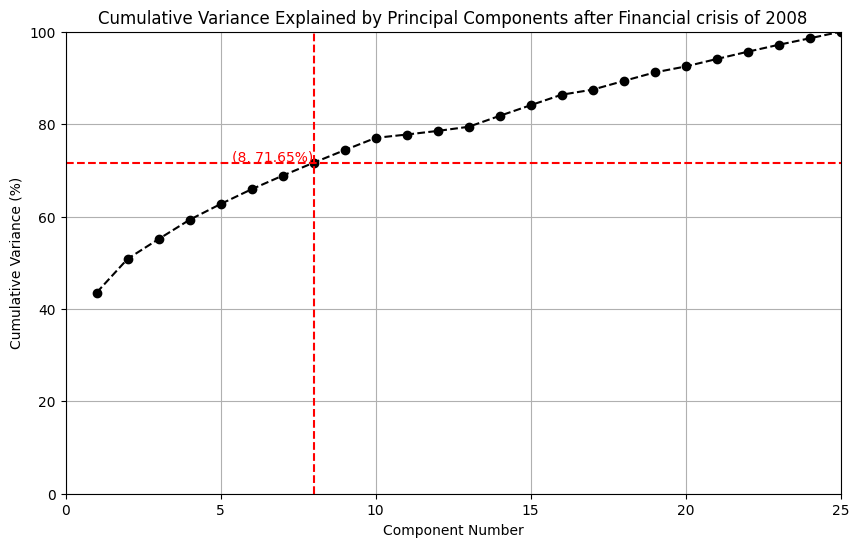

In [21]:
# Total study period from 20/09/2007 to 01/11/2024
hs_2008_after = hs_log_returns.loc[(hs_log_returns.index>'2007-09-19')]
corr_matrix = np.corrcoef(hs_2008_after.T)
eigenvalue, _ = np.linalg.eig(corr_matrix)
p = 25
cumulative_variance = np.cumsum(eigenvalue) * 100/p
print(f"cumulative variance is :{cumulative_variance}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), cumulative_variance, ls='dashed', marker='o', c='black')
plt.axhline(y=cumulative_variance[7], color='r', linestyle='--')
plt.axvline(x=8, color='r', linestyle='--')
plt.text(8, 72, f'(8, {cumulative_variance[7]:.2f}%)', color='red', fontsize=10, ha='right')

# Add labels and title
plt.title('Cumulative Variance Explained by Principal Components after Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Variance (%)')
plt.xlim(0, p)
plt.ylim(0, 100)
plt.grid()
# Show plot
plt.show()

### second rule

In [22]:
corr_matrix = np.corrcoef(hs_log_returns.T)
eigenvalue1, _ = np.linalg.eig(corr_matrix)
use_index = np.where(eigenvalue1>=1)
retain_pca1 = [f'PC{x+1}' for x in use_index]
corr_matrix = np.corrcoef(hs_2008_before.T)
eigenvalue2, _ = np.linalg.eig(corr_matrix)
use_index = np.where(eigenvalue2>=1)
retain_pca2 = [f'PC{x+1}' for x in use_index]
corr_matrix = np.corrcoef(hs_2008_after.T)
eigenvalue3, _ = np.linalg.eig(corr_matrix)
use_index = np.where(eigenvalue3>=1)
retain_pca3 = [f'PC{x+1}' for x in use_index]
print(f"eigenvalues of all period:{eigenvalue1}")
print(f"retained components are:{retain_pca1}")
print(f"eigenvalues of period before crisis:{eigenvalue2}")
print(f"retained components are:{retain_pca2}")
print(f"eigenvalues of period after crisis:{eigenvalue3}")
print(f"retained components are:{retain_pca3}")

eigenvalues of all period:[10.2048347   1.75154749  1.0833996   1.01084064  0.87747939  0.81891815
  0.79274905  0.21960951  0.24146814  0.74136141  0.27714772  0.28592377
  0.69894217  0.69205514  0.6489086   0.5969493   0.58505469  0.33535734
  0.38251859  0.38425886  0.52601488  0.42704884  0.49783945  0.4692543
  0.45051828]
retained components are:['PC[1 2 3 4]']
eigenvalues of period before crisis:[8.85323706 1.60100359 1.32531983 0.18764588 1.02100292 0.96898339
 0.27642834 0.91069744 0.30775289 0.83339488 0.81444969 0.77933633
 0.36116941 0.72735407 0.41978889 0.44253137 0.45881154 0.48185847
 0.67656039 0.6486597  0.63534583 0.59522977 0.58513525 0.53473438
 0.55356869]
retained components are:['PC[1 2 3 5]']
eigenvalues of period after crisis:[10.88493896  1.82641149  1.06958712  1.04374961  0.85253562  0.80009245
  0.73361561  0.70135453  0.67995825  0.66261919  0.18135109  0.19588259
  0.22348719  0.59088498  0.57714883  0.56789322  0.27451099  0.46880593
  0.46219878  0.32

### third rule

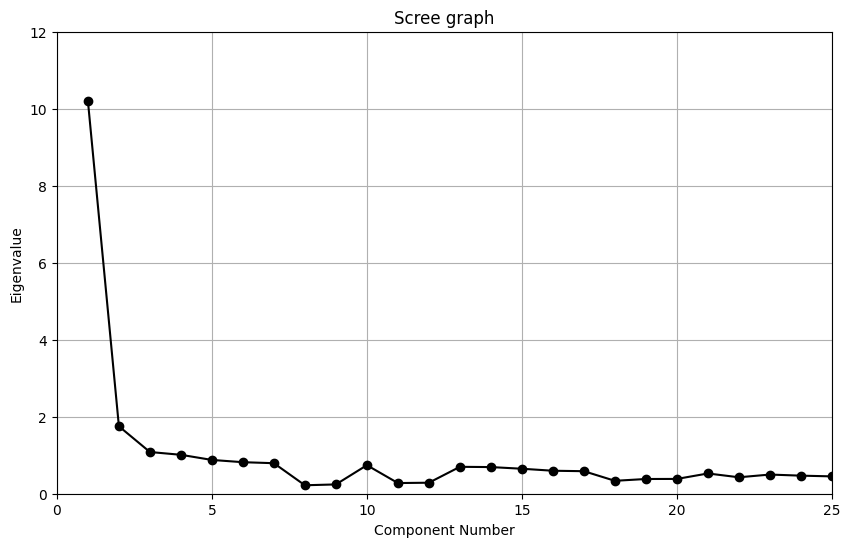

In [23]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), eigenvalue1, marker='o', c='black')

# Add labels and title
plt.title('Scree graph')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.xlim(0, p)
plt.ylim(0, 12)
plt.grid()
# Show plot
plt.show()

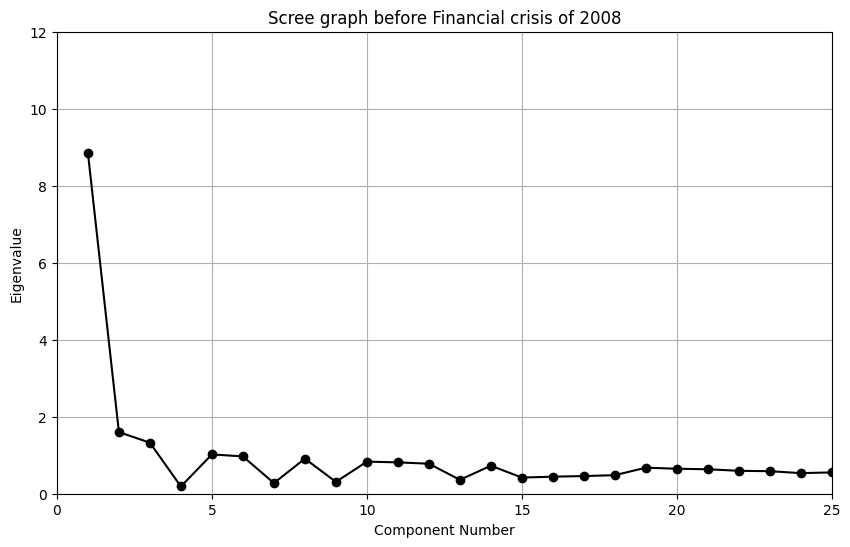

In [24]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), eigenvalue2, marker='o', c='black')

# Add labels and title
plt.title('Scree graph before Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.xlim(0, p)
plt.ylim(0, 12)
plt.grid()
# Show plot
plt.show()

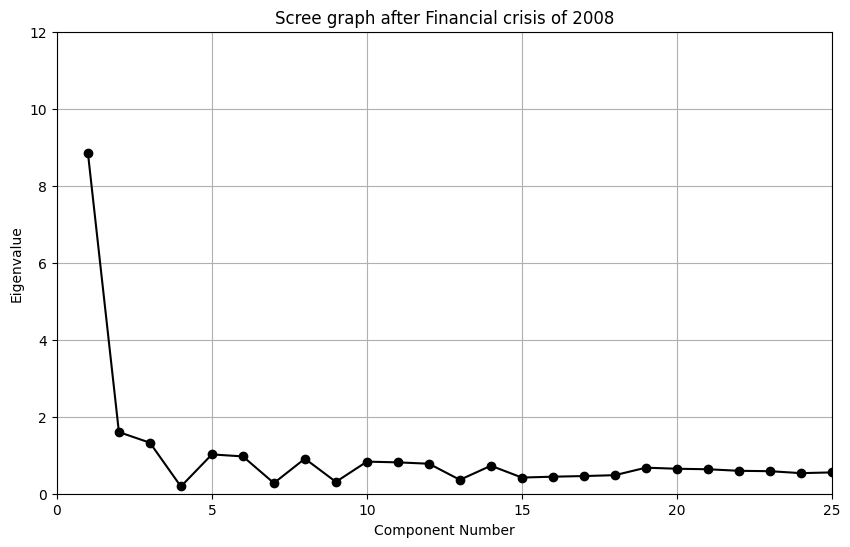

In [25]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), eigenvalue2, marker='o', c='black')

# Add labels and title
plt.title('Scree graph after Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.xlim(0, p)
plt.ylim(0, 12)
plt.grid()
# Show plot
plt.show()

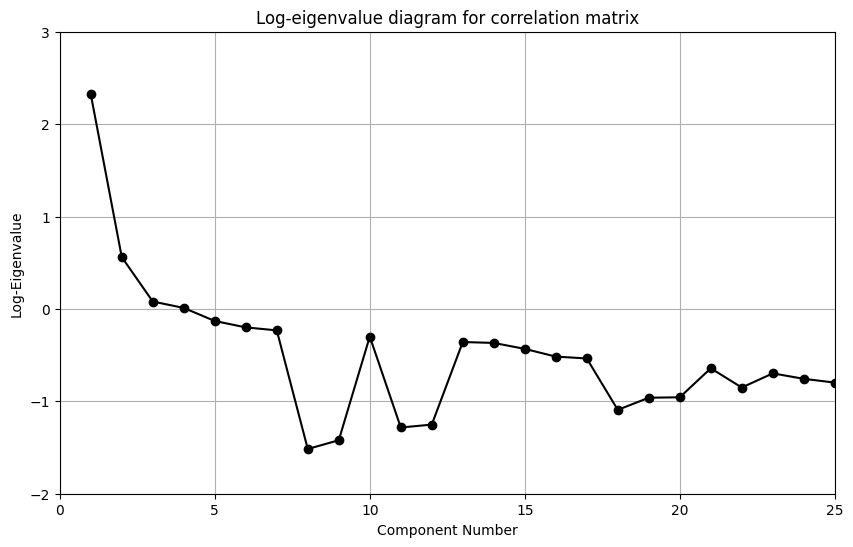

In [26]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), np.log(eigenvalue1), marker='o', c='black')

# Add labels and title
plt.title('Log-eigenvalue diagram for correlation matrix')
plt.xlabel('Component Number')
plt.ylabel('Log-Eigenvalue')
plt.xlim(0, p)
plt.ylim(-2, 3)
plt.grid()
# Show plot
plt.show()

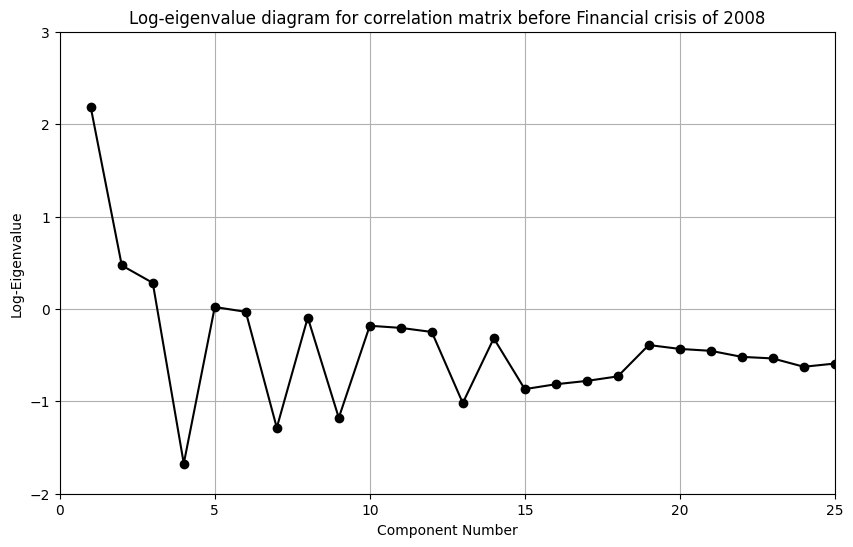

In [27]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), np.log(eigenvalue2), marker='o', c='black')

# Add labels and title
plt.title('Log-eigenvalue diagram for correlation matrix before Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Log-Eigenvalue')
plt.xlim(0, p)
plt.ylim(-2, 3)
plt.grid()
# Show plot
plt.show()

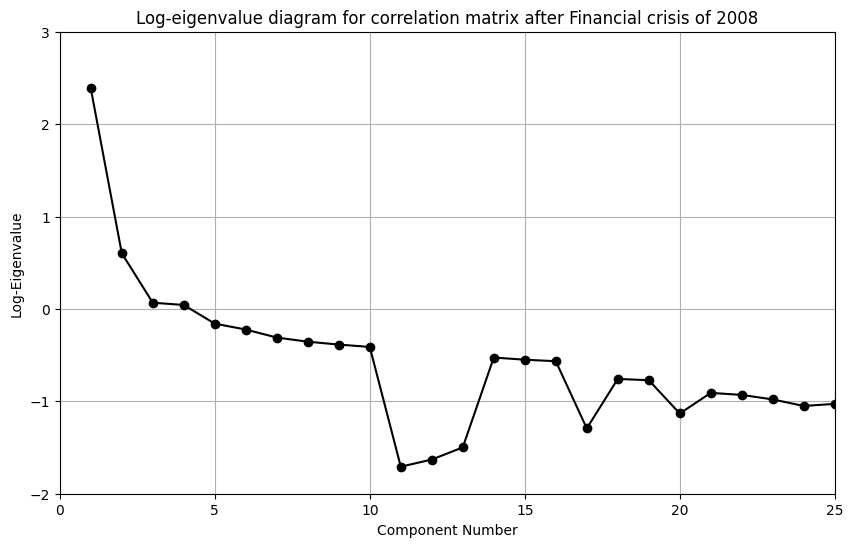

In [28]:
# Total study period
plt.figure(figsize=(10, 6))
plt.plot(range(1, p+1), np.log(eigenvalue3), marker='o', c='black')

# Add labels and title
plt.title('Log-eigenvalue diagram for correlation matrix after Financial crisis of 2008')
plt.xlabel('Component Number')
plt.ylabel('Log-Eigenvalue')
plt.xlim(0, p)
plt.ylim(-2, 3)
plt.grid()
# Show plot
plt.show()